# Установим необходимые библиотеки

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Для управления предупреждениями

from sklearn import linear_model
# print(sklearn.__version__)
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [104]:
db_path='C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/diabetes_coursework/diabetes_012_health_indicators_BRFSS2015.csv'
data= pd.read_csv(db_path)
# Установим максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Выполним преобразование данных в целочисленный тип (integer).

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Выведем информацию о количестве строк и столбцов датасета

In [106]:
# data.shape
print(f"Num rows: {len(data)}")
print(f"Num columns: {len(data.columns)}")

Num rows: 253680
Num columns: 22


In [107]:
data.shape

(253680, 22)

# Визуализируем данные по целевой переменной (0 - No diabetes, 1 - pred-diabetes, 2 - diabetes

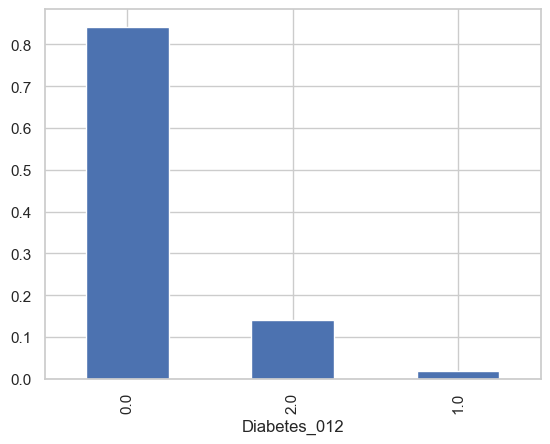

In [108]:
data['Diabetes_012'].value_counts(normalize=True).plot(kind='bar');

# Выведем названия столбцов датасета

In [109]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Используем метод data.describe() из pandas для получения сводной статистики о данных датасета. Этот метод предоставляет полезную информацию о распределении данных в каждом столбце, включая такие статистические показатели

In [110]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Применим метод isnull().sum(), библиотека pandas, для проверки наличия пропущенных (нулевых) значений в DataFrame data. Этот метод возвращает новый DataFrame того же размера, что и data, где каждое значение заменяется на True, если оно является пропущенным (null или NaN), и на False, если оно не является пропущенным.На выходе получаем логическую матрицу, где True указывает на наличие пропущенного значения.

In [111]:
print(data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [112]:
# Проверка на наличие хотя бы одного пропущенного значения
has_missing_values = data.isnull().sum().any()
print(has_missing_values)  # Вывод: True, если есть пропущенные

False


# как видим выше, пропущенных значений нет

# Проверим на дубликаты

In [113]:
data.duplicated().sum()

23899

In [114]:
duplicates = data[data.duplicated(keep=False)]  # keep=False возвращает все дубликаты
print(duplicates.sum())
# Подсчет дубликатов по целевому признаку
duplicate_counts = duplicates['Diabetes_012'].value_counts()

# Вывод результатов
for class_value, count in duplicate_counts.items():
    print(f"Целевой признак 'Diabetes_012' == {class_value}: {count} дубликатов")

Diabetes_012               962.0
HighBP                    7319.0
HighChol                  9637.0
CholCheck                34777.0
BMI                     900190.0
Smoker                    8829.0
Stroke                      16.0
HeartDiseaseorAttack       330.0
PhysActivity             34140.0
Fruits                   28801.0
Veggies                  33839.0
HvyAlcoholConsump          550.0
AnyHealthcare            35035.0
NoDocbcCost                 54.0
GenHlth                  59647.0
MentHlth                  4490.0
PhysHlth                  3523.0
DiffWalk                    97.0
Sex                      15972.0
Age                     266927.0
Education               198892.0
Income                  264737.0
dtype: float64
Целевой признак 'Diabetes_012' == 0.0: 34603 дубликатов
Целевой признак 'Diabetes_012' == 2.0: 479 дубликатов
Целевой признак 'Diabetes_012' == 1.0: 4 дубликатов


In [115]:
def count_duplicates_by_target(data, target_column):
    """
    Подсчитывает количество дубликатов для каждого значения целевого признака.

    :param data: pd.DataFrame - входной DataFrame с данными
    :param target_column: str - имя целевого признака
    """
    # Получаем все дубликаты
    duplicates = data[data.duplicated(keep=False)]

    # Подсчитываем общее количество дубликатов для каждого класса целевого признака
    duplicate_counts = duplicates[target_column].value_counts()

    # Выводим результаты
    for class_value, count in duplicate_counts.items():
        print(f"Целевой признак '{target_column}' == {class_value}: {count} дубликатов")

# Пример использования
count_duplicates_by_target(data, 'Diabetes_012')

Целевой признак 'Diabetes_012' == 0.0: 34603 дубликатов
Целевой признак 'Diabetes_012' == 2.0: 479 дубликатов
Целевой признак 'Diabetes_012' == 1.0: 4 дубликатов


# Метод loc для доступа к строкам и столбцам DF по меткам. В данном случае для выбора строк, которые соответствуют условию, указанному в квадратных скобках, то есть для выбора дубликатов. Двоеточие : после запятой указывает, что мы хотим выбрать все столбцы для этих строк.

In [116]:
data.loc[data.duplicated(),:]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


# Удалим дубликаты и выведем размер DF после их  удаления.

In [117]:
data.drop_duplicates(inplace=True)
data.shape

(229781, 22)

# Построим тепловую карту для визуализации корреляционной матрицы с помощью библиотеки seaborn, которая является высокоуровневой библиотекой для визуализации данных на основе matplotlib.data.corr(): Этот метод вычисляет корреляцию между числовыми столбцами в DataFrame data. Он возвращает корреляционную матрицу, где каждая ячейка содержит коэффициент корреляции Пирсона между двумя столбцами. Значения корреляции варьируются от -1 до 1:1 означает полную положительную корреляцию (когда один столбец увеличивается, другой также увеличивается).-1 означает полную отрицательную корреляцию (когда один столбец увеличивается, другой уменьшается).0 означает отсутствие корреляции.sns.heatmap(...): Этот метод из библиотеки seaborn создает тепловую карту (heatmap) на основе переданной матрицы. Тепловая карта визуализирует данные в виде цветных ячеек, где цвет каждой ячейки соответствует значению в матрице. annot=True: Этот параметр указывает, что значения корреляции должны быть отображены в ячейках тепловой карты. Если вы установите annot=False, значения не будут отображаться.cmap="YlGnBu": Этот параметр задает цветовую палитру для тепловой карты. В данном случае используется палитра "YlGnBu", которая представляет собой градиент от желтого (низкие значения) к синему (высокие значения).

<Axes: >

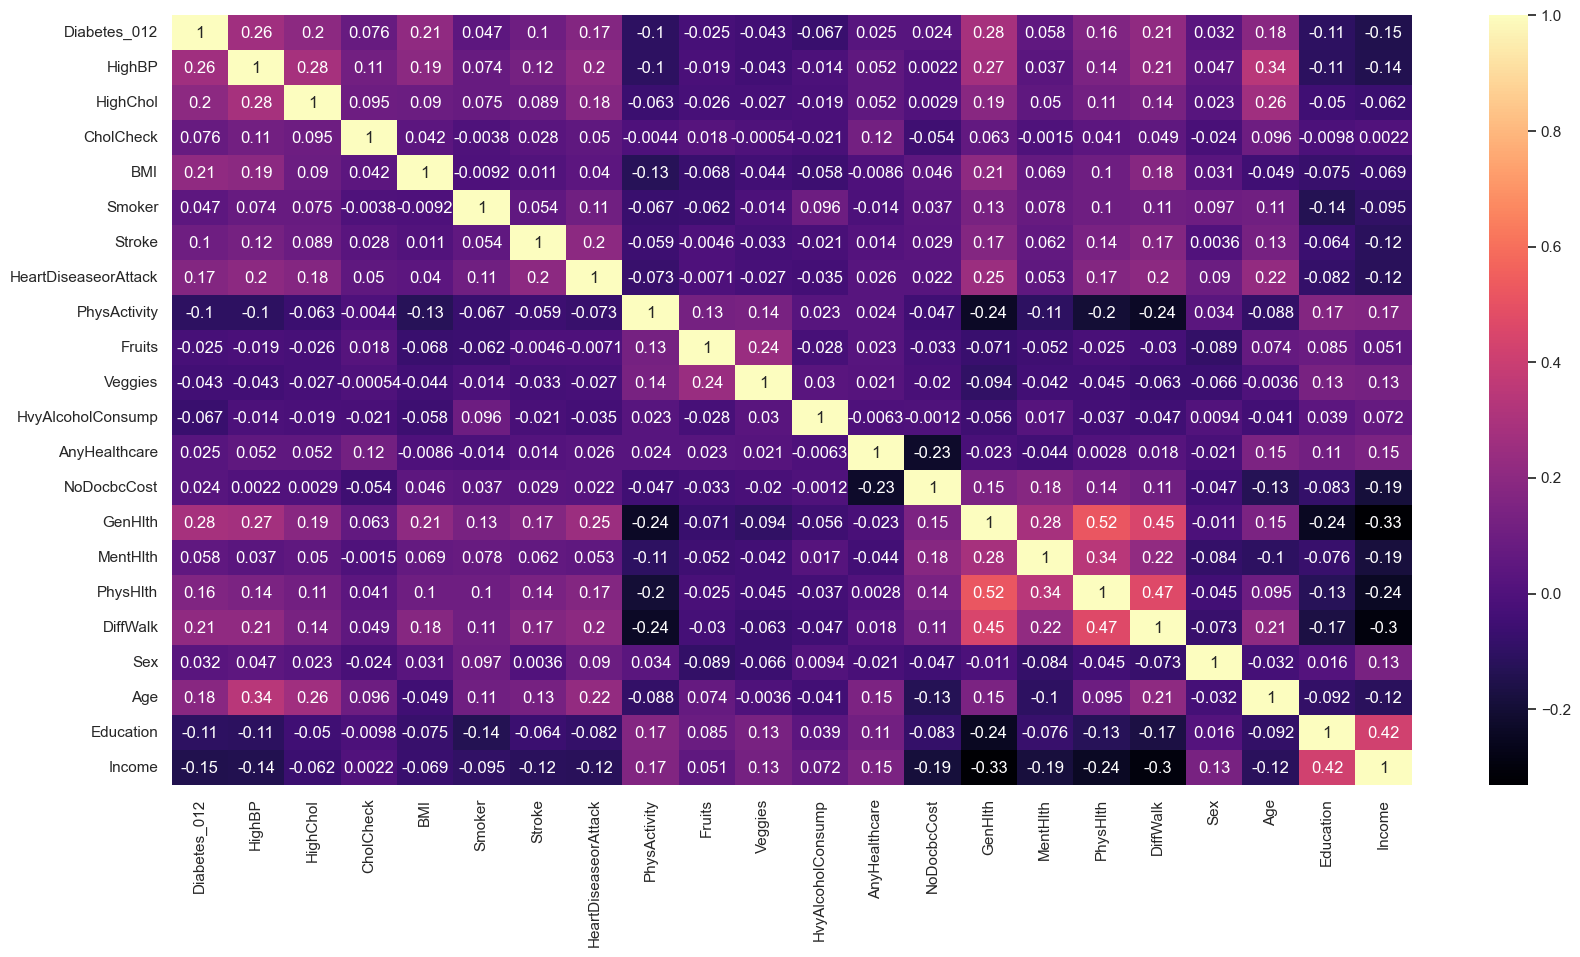

In [118]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="magma")

In [119]:
df_vis=data.copy()

# Преобразуем значения в копии DF для лучшего понимания при визуализации

In [120]:
#divide data for categorial group
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 0] = 'No Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Pre Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 2] = 'Diabetes'

df_vis.HighBP[df_vis['HighBP'] == 0] = 'No High BP'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'High BP'

df_vis.HighChol[df_vis['HighChol'] == 0] = 'No High Cholesterol'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'High Cholesterol'

df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_vis.Smoker[df_vis['Smoker'] == 0] = 'No'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Yes'

df_vis.Stroke[df_vis['Stroke'] == 0] = 'No'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Yes'

df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'No'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Yes'

df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'No'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Yes'

df_vis.Fruits[df_vis['Fruits'] == 0] = 'No'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Yes'

df_vis.Veggies[df_vis['Veggies'] == 0] = 'No'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Yes'

df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'No'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Yes'

df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'No'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Yes'

df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'No'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Yes'
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excellent'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Very Good'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Good'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Fair'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'Poor'

df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'No'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Yes'

df_vis.Sex[df_vis['Sex'] == 0] = 'Female'
df_vis.Sex[df_vis['Sex'] == 1] = 'Male'

df_vis.Education[df_vis['Education'] == 1] = 'Never Attended School'
df_vis.Education[df_vis['Education'] == 2] = 'Elementary'
df_vis.Education[df_vis['Education'] == 3] = 'Some high school'
df_vis.Education[df_vis['Education'] == 4] = 'High school graduate'
df_vis.Education[df_vis['Education'] == 5] = 'Some college or technical school'
df_vis.Education[df_vis['Education'] == 6] = 'College graduate'

df_vis.Income[df_vis['Income'] == 1] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 2] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 3] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 4] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 5] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 6] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 7] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 8] = '$75,000 or More'

# Проведем визуализацию данных

# Проверим сколько уникальных значений содержит каждый столбец

In [121]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['количество уник.значений']).transpose()

,количество уник.значений
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


# Создадим список с 1го элемента(без Diabetes_012)	

In [122]:
cols = list(df_vis.columns)
cols_df=cols[1:]

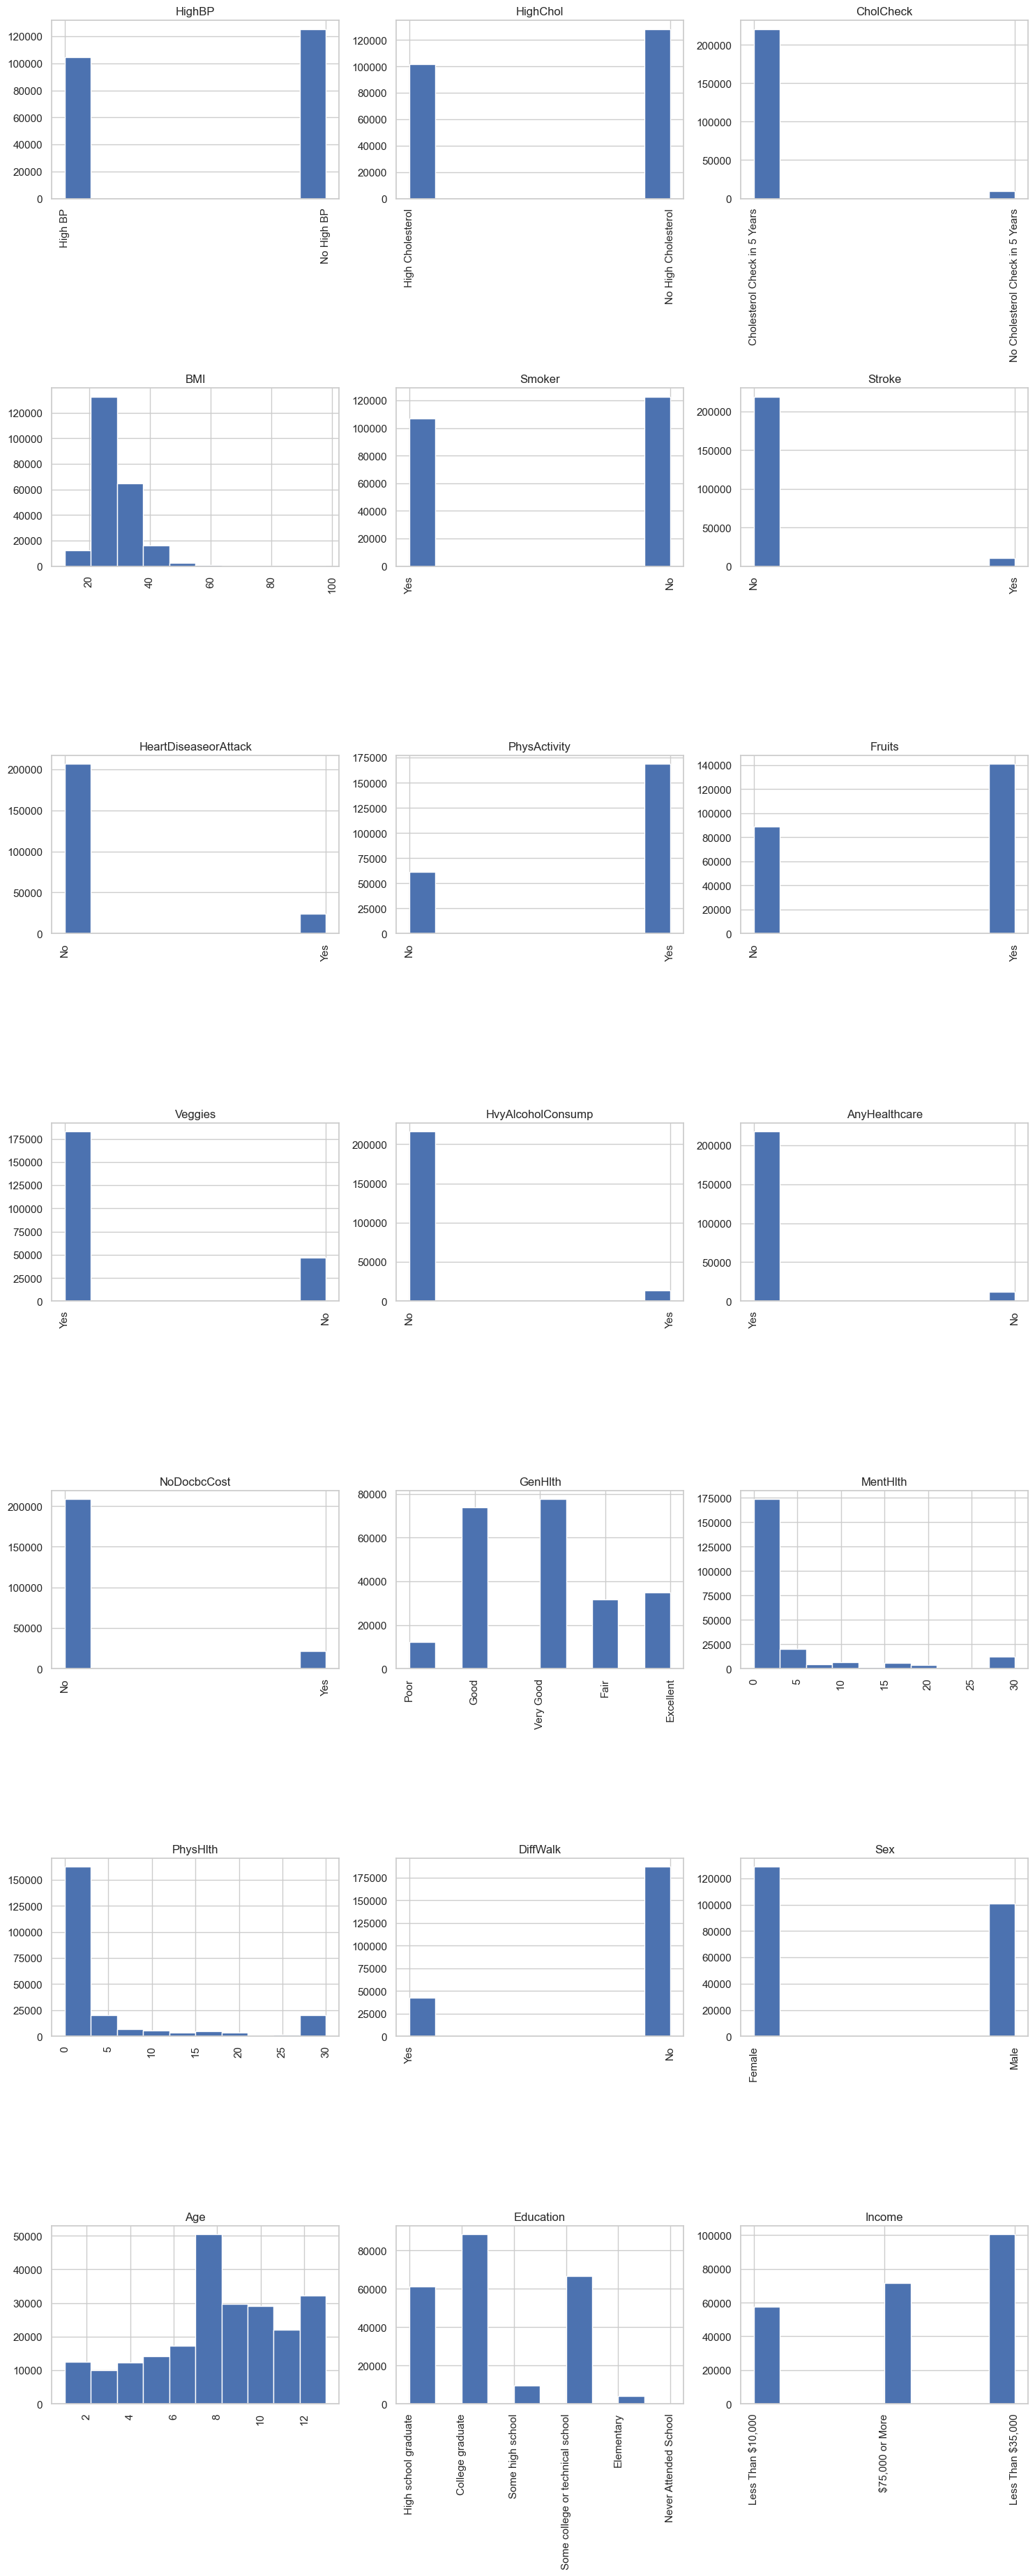

In [123]:
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()
plt.savefig('Addendum1_6.png')

# Соотношение сахарного диабета в датасете с их типами

In [124]:
df_vis['Diabetes_012'].value_counts()

Diabetes_012
No Diabetes     190055
Diabetes         35097
Pre Diabetes      4629
Name: count, dtype: int64

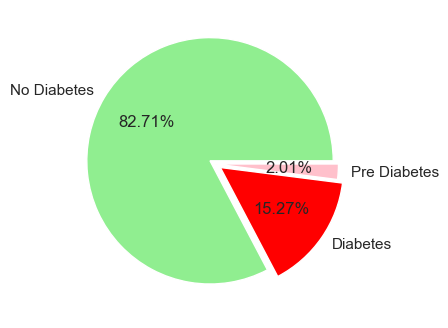

In [125]:
# pie plot of diabetes ratio 
plt.figure(figsize=(6,4))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [df_vis['Diabetes_012'].value_counts()[0], df_vis['Diabetes_012'].value_counts()[1], df_vis['Diabetes_012'].value_counts()[2]]
colors = ['lightgreen', 'red', 'pink']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f%%', colors=colors, data = df_vis);

# Корреляция с Diabetes_012 через гистограмму

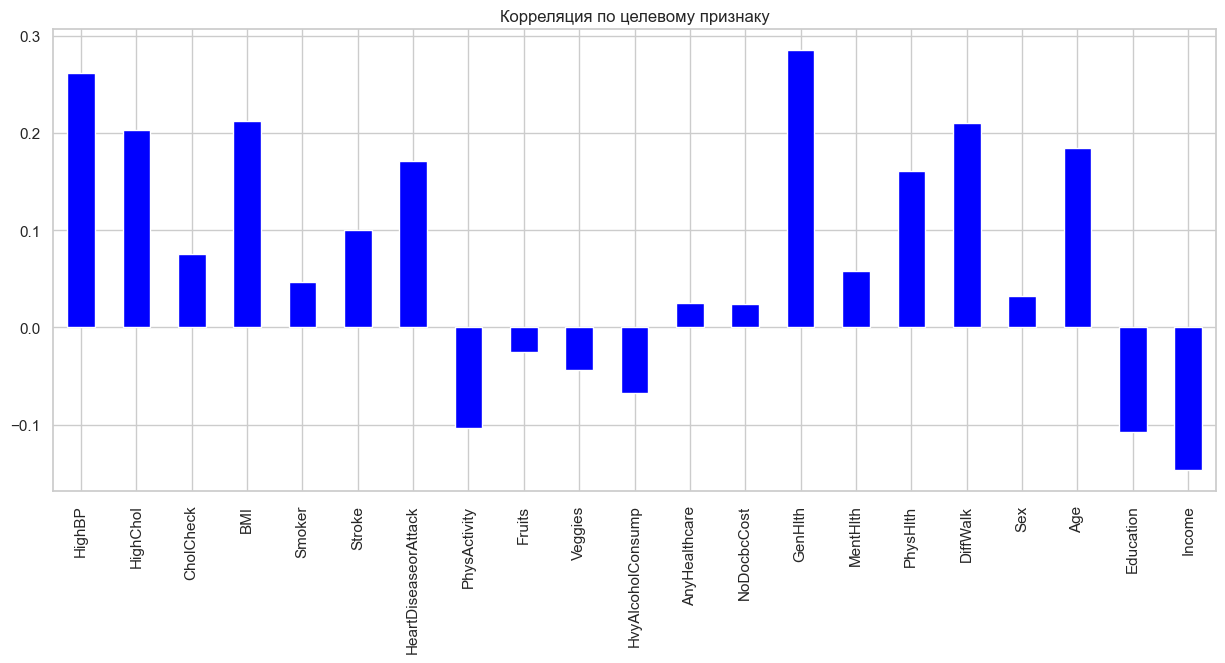

In [126]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Корреляция по целевому признаку",color="blue");

# Выводы: Связь Diabetes_binary с другими столбцами в гистограмме:
1: Фрукты, AnyHealthcare, NoDocbccost и пол наименее коррелируют с Diabetes_binary.
2. Высокий уровень АД, холестерина , ИМТ , курение , инсульт, сердечные заболевания или приступы, Физическая активность, Овощи, употребление алкоголя.

# Распределение сахарного диабета среди мужчин и женщин //  Вывод: пол не имеет особого влияния

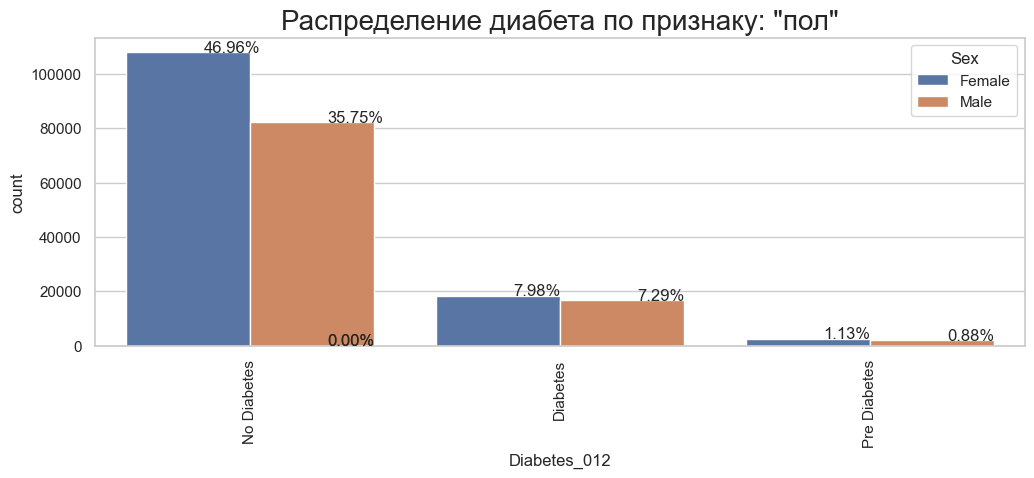

In [127]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=df_vis,hue='Sex')
plt.xticks(rotation=90)
plt.title('Распределение диабета по признаку: "пол"',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Курение

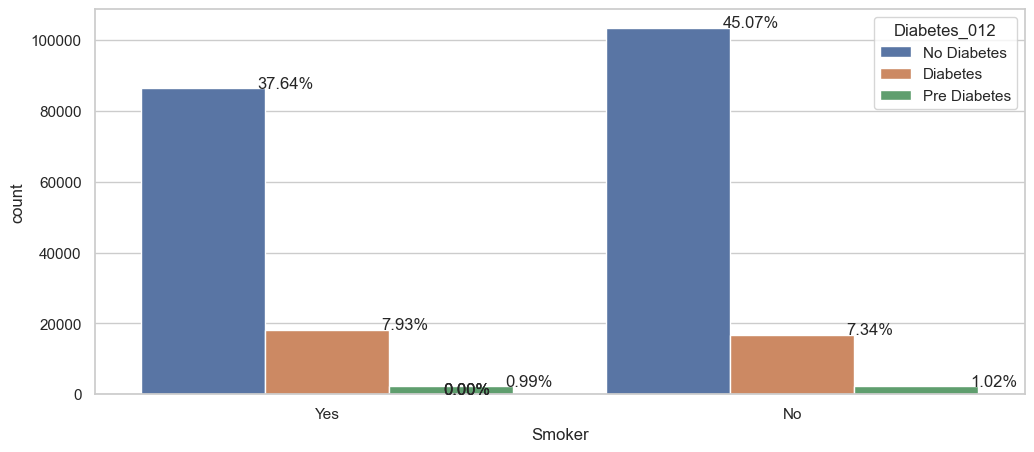

In [128]:
# Распределение сахарного диабета по признаку "Курение"
plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Частое употребление алкоголя

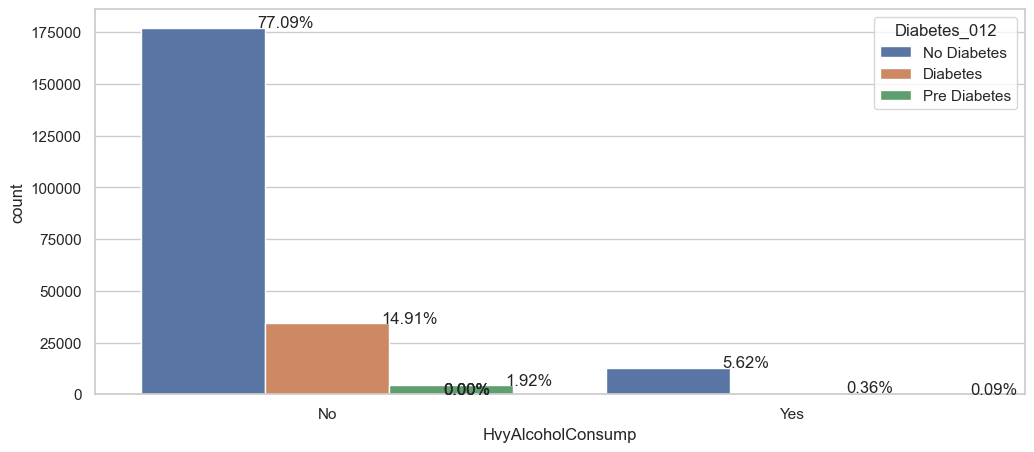

In [129]:
# Распределение сахарного диабета по признаку "Частое употребление алкоголя"
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# По-отдельности курение и алкоголь не оказывают сильного влияния на диабет. Проверим их совместную значимость

Text(0.5, 1.0, 'Взаимосвязь по признакам: Курение, Алкоголь и Диабет')

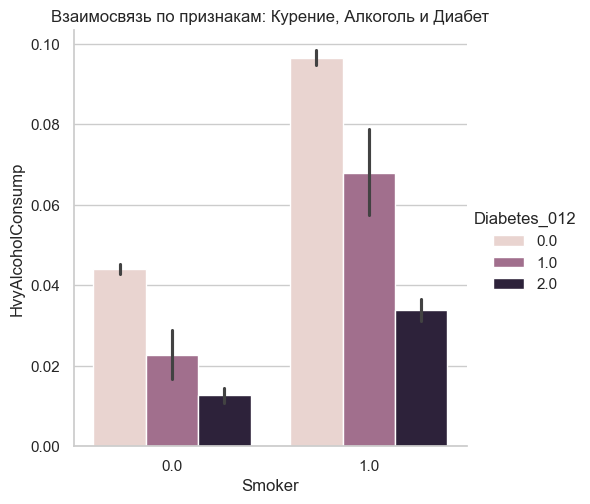

In [130]:
# Взаимосвязь по признакам: Курение, Алкоголь и Диабет
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_012"  , kind="bar"  );  
plt.title("Взаимосвязь по признакам: Курение, Алкоголь и Диабет")

# Результат: Согласно этим данным, одновременно курение и употребление большого количества алкоголя повышают риск диабета.

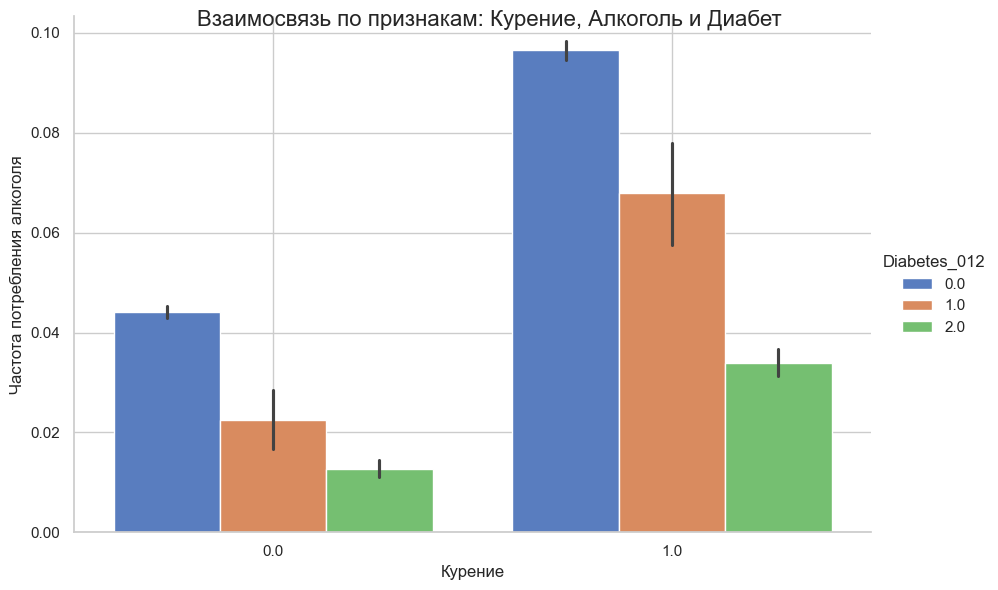

In [131]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Создание графика
g = sns.catplot(
    x="Smoker", 
    y="HvyAlcoholConsump", 
    data=data, 
    hue="Diabetes_012", 
    kind="bar", 
    palette="muted",  # Изменение цветовой палитры
    height=6,         # Высота графика
    aspect=1.5        # Соотношение сторон
)

# Настройка заголовка и меток
g.fig.suptitle("Взаимосвязь по признакам: Курение, Алкоголь и Диабет", fontsize=16)
g.set_axis_labels("Курение", "Частота потребления алкоголя")
g.set_titles("{col_name}")  # Установка заголовка для каждой подгруппы

# Показать сетку на графике
plt.grid(True)

# Отображение графика
plt.show()

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

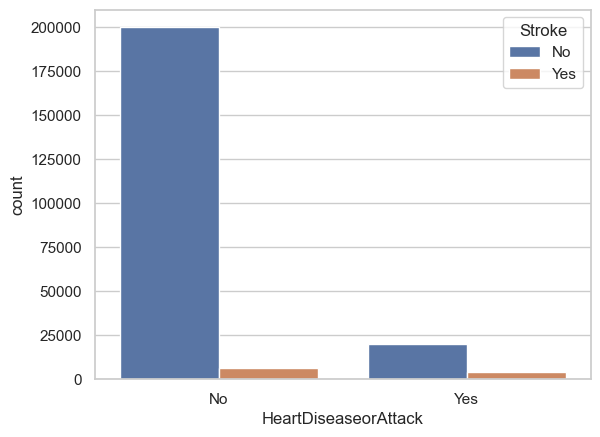

In [132]:
sns.countplot(data=df_vis,x='HeartDiseaseorAttack',hue='Stroke')

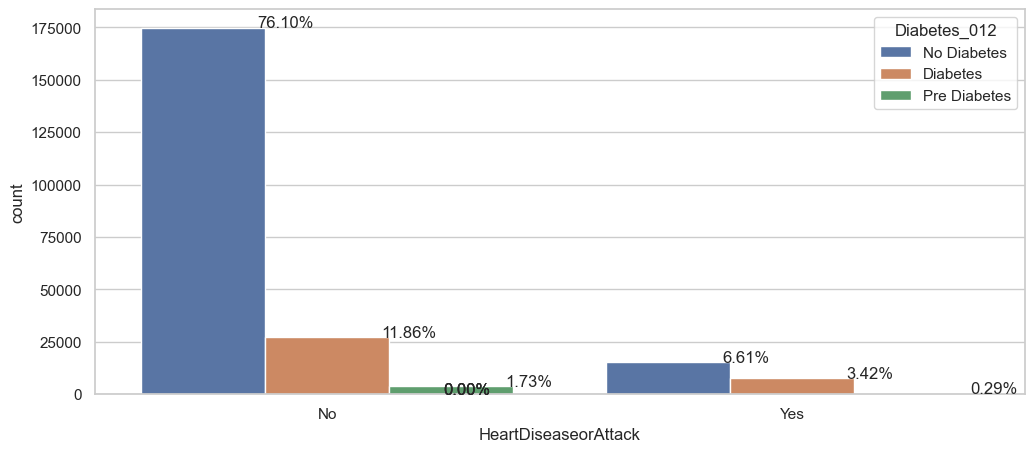

In [133]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()


# Вероятность развития диабета возрастает по мере того, как у человека возникают сердечные заболевания или приступы

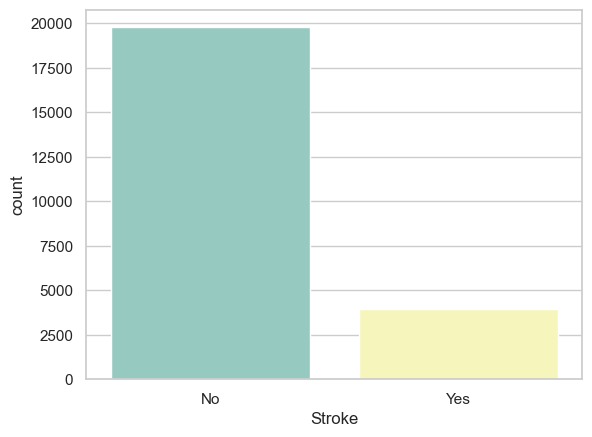

In [134]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df_vis[df_vis['HeartDiseaseorAttack']=="Yes"],x='Stroke',palette='Set3');

# Инфаркт повышает риск Инсульта. Проверим их совместное влияние на Диабет

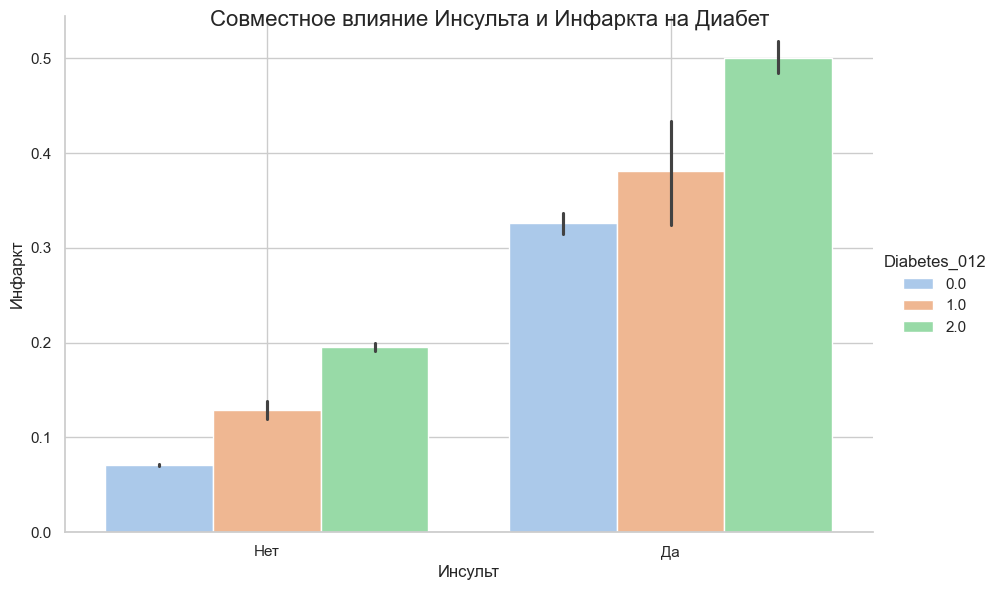

In [135]:
# Инфаркт повышает риск Инсульта. Проверим их совместное влияние на диабет
# Установка стиля графиков
sns.set(style="whitegrid")

# Создание графика
g = sns.catplot(
    x="Stroke", 
    y="HeartDiseaseorAttack", 
    data=data, 
    hue="Diabetes_012", 
    kind="bar", 
    palette="pastel",  # Изменение цветовой палитры
    height=6,          # Высота графика
    aspect=1.5         # Соотношение сторон
)

# Настройка заголовка и меток
g.fig.suptitle("Совместное влияние Инсульта и Инфаркта на Диабет", fontsize=16)
g.set_axis_labels("Инсульт", "Инфаркт")
g.set_xticklabels(["Нет", "Да"])  # Установка меток по оси X

plt.grid(True)

Text(0.5, 1.0, 'Совместное влияние Инсульта и Инфаркта на Диабет')

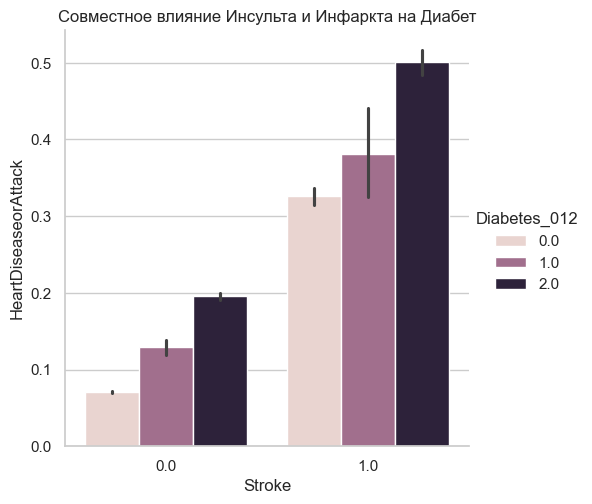

In [136]:
# (1 in Stroke is Yes), (1 in HeartDiseaseorAttack is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_012"  , kind="bar"  );
plt.title("Совместное влияние Инсульта и Инфаркта на Диабет")

# Вывод: инсульт и сердечные заболевания вместе повышают риск развития диабета

# Влияние поывшенного давления

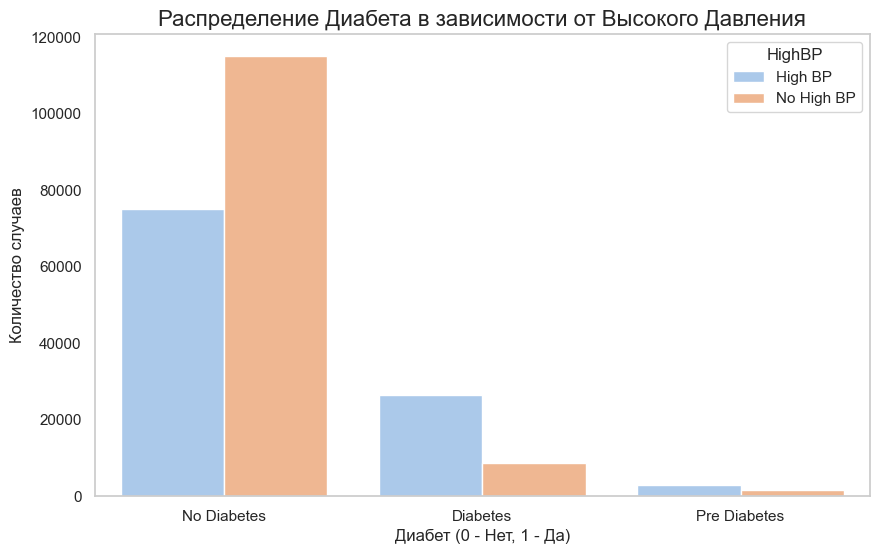

In [137]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры с заданными размерами
plt.figure(figsize=(10, 6))

# Построение графика countplot
sns.countplot(
    data=df_vis, 
    x='Diabetes_012', 
    hue='HighBP', 
    palette='pastel'  # Изменение цветовой палитры
)

# Настройка заголовка и меток осей
plt.title("Распределение Диабета в зависимости от Высокого Давления", fontsize=16)
plt.xlabel("Диабет (0 - Нет, 1 - Да)", fontsize=12)
plt.ylabel("Количество случаев", fontsize=12)

# Показать сетку на графике
plt.grid(axis='y')

# Отображение графика
plt.show()

# sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#5aef1')

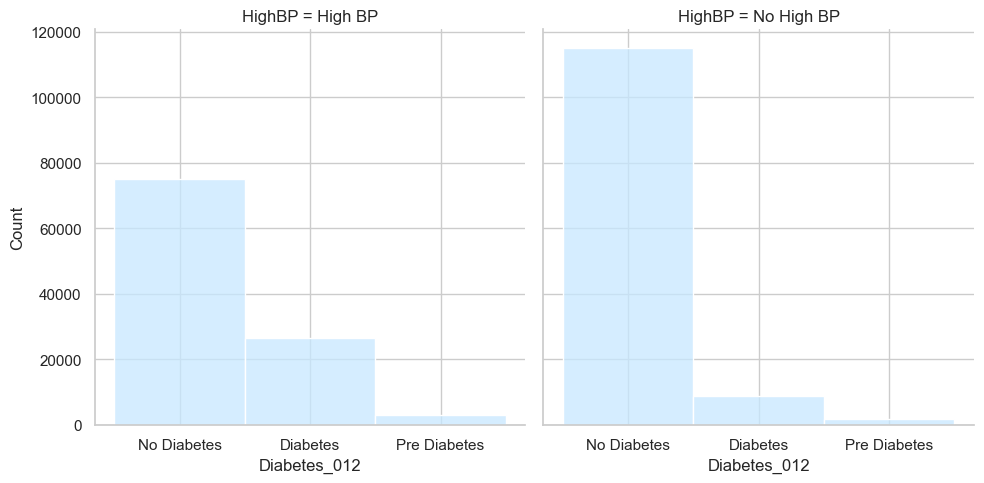

In [138]:

sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#c7e8ff')

# Высокий уровень холестерина

<Axes: xlabel='Diabetes_012', ylabel='count'>

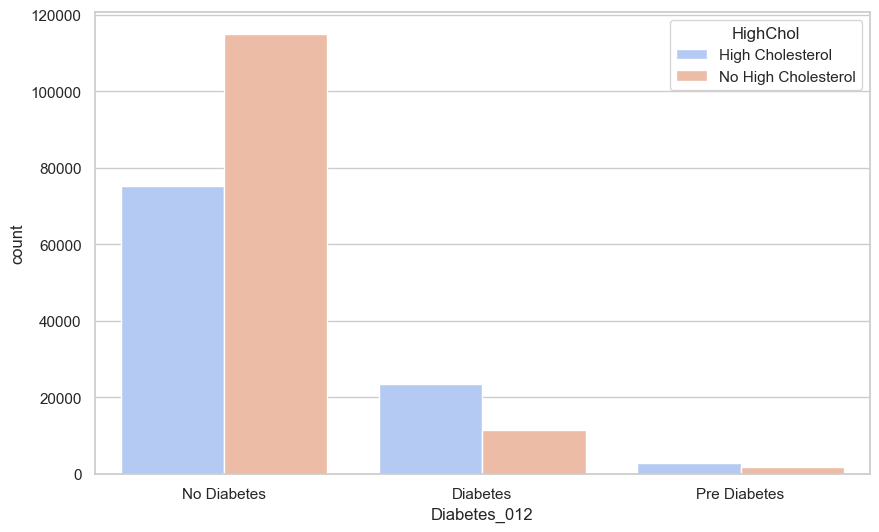

In [139]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighChol',palette='coolwarm')

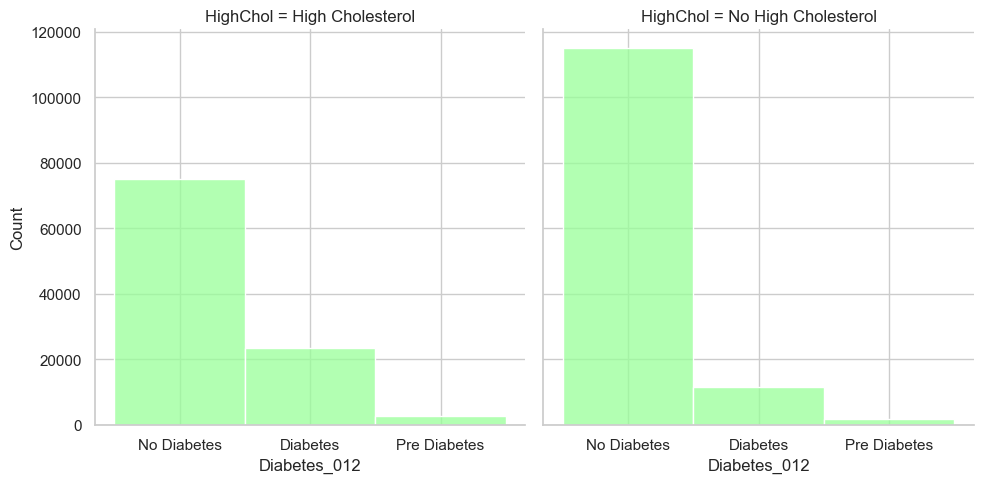

In [140]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighChol',color='#98ff98')

# Выводы: диабетики, как правило, имеют высокое кровяное давление и повышенный уровень холестерина. Проверим их совместное влияние на диабет.

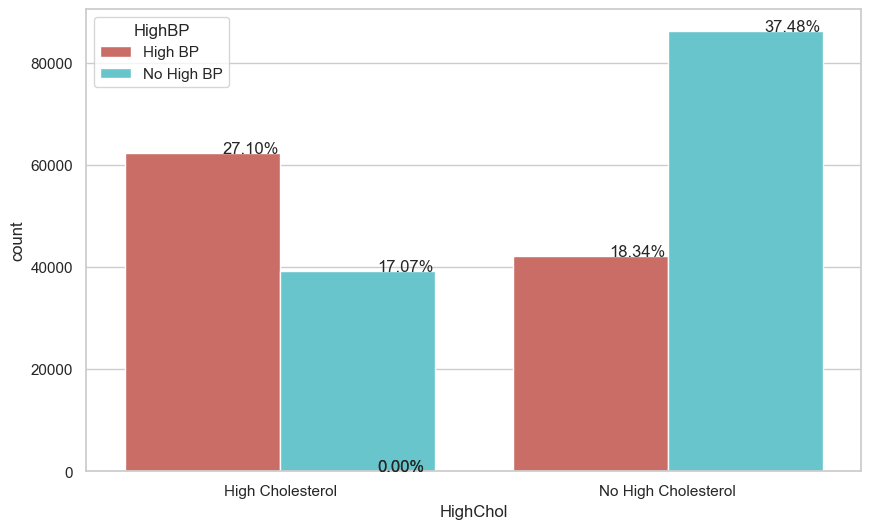

In [141]:
# HighChol with HighBP
plt.figure(figsize=(10,6))
x=sns.countplot(data=df_vis,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/df_vis.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# высокий уровень холестерина и высокое кровяное давление тесно связаны друг с другом, поскольку люди с высоким уровнем холестерина, как правило, имеют высокое кровяное давление.
Связь между высоким BP и высоким уровнем холестерина идет в обоих направлениях. Когда организм не может вывести холестерин из кровотока, этот избыток холестерина может откладываться на стенках артерий. Когда артерии становятся жесткими и сужаются из-за отложений, сердцу приходится работать более интенсивно, чтобы прокачивать по ним кровь. Это приводит к тому, что кровяное давление все более повышается.

# Проверка комбинированного влияния HighBP и HighChol на диабет

Text(0.5, 1.0, 'Комбинированное влияние HighBP и HighChol на диабет')

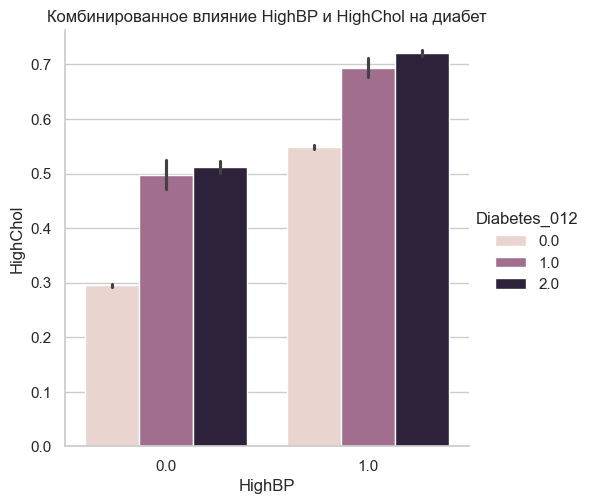

In [142]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Комбинированное влияние HighBP и HighChol на диабет")

# вывод: высокий уровень АД и высокий уровень холестерина одновременно повышают риск развития диабета.

# BMI - Индекс массы тела

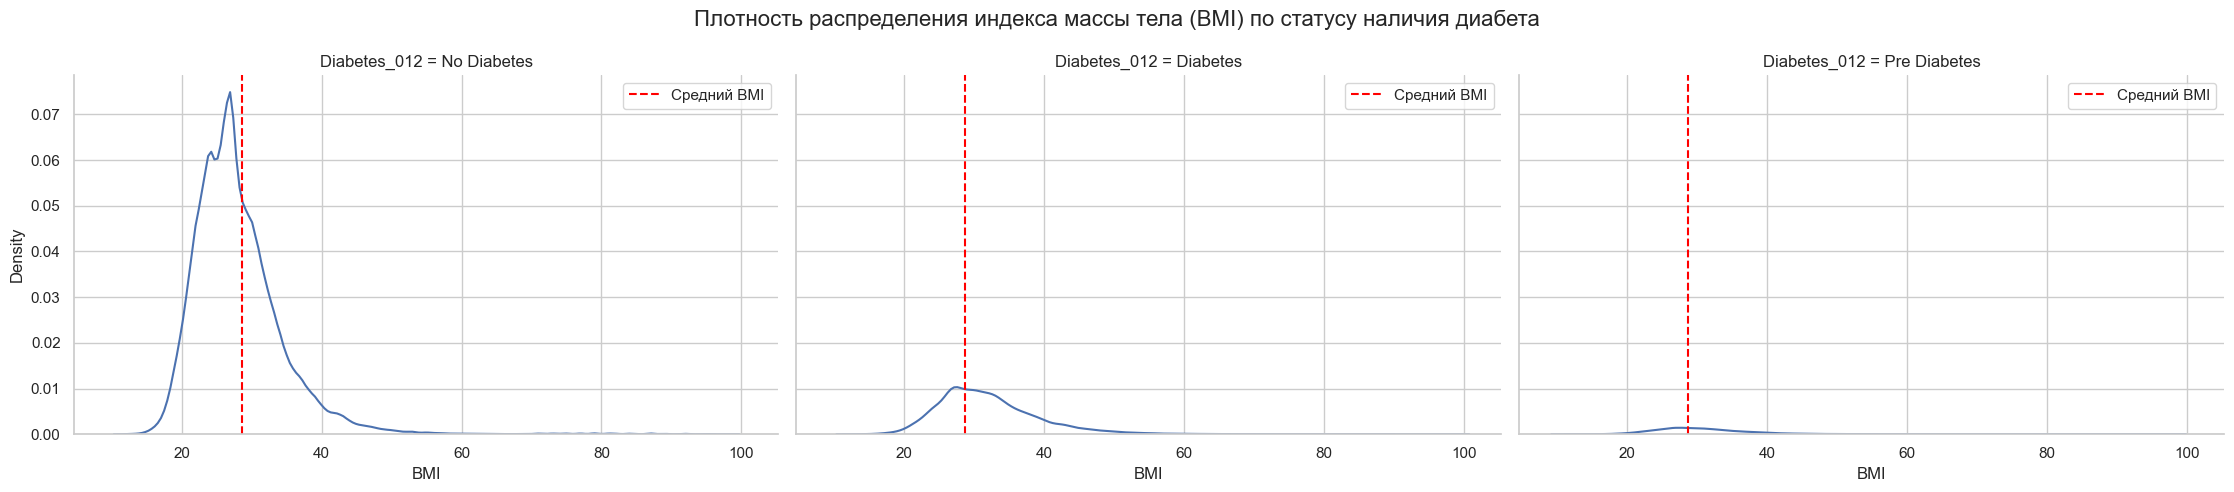

In [143]:
def plot_density_distribution(data, feature, hue, title):
    sns.set(style="whitegrid")  # Установка стиля

    # Создание графика
    grafic = sns.displot(x=feature, col=hue, data=data, kind="kde", palette="pastel", height=5, aspect=1.5)

    # Добавление заголовка
    grafic.fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)  # Увеличьте пространство для заголовка

    # Добавление вертикальной линии для среднего значения
    mean_value = data[feature].mean()
    for ax in grafic.axes.flat:
        ax.axvline(mean_value, color='red', linestyle='--', label='Средний ' + feature)
        ax.legend()

    plt.show()

# Вызов функции
plot_density_distribution(df_vis, 'BMI', 'Diabetes_012', "Плотность распределения индекса массы тела (BMI) по статусу наличия диабета")

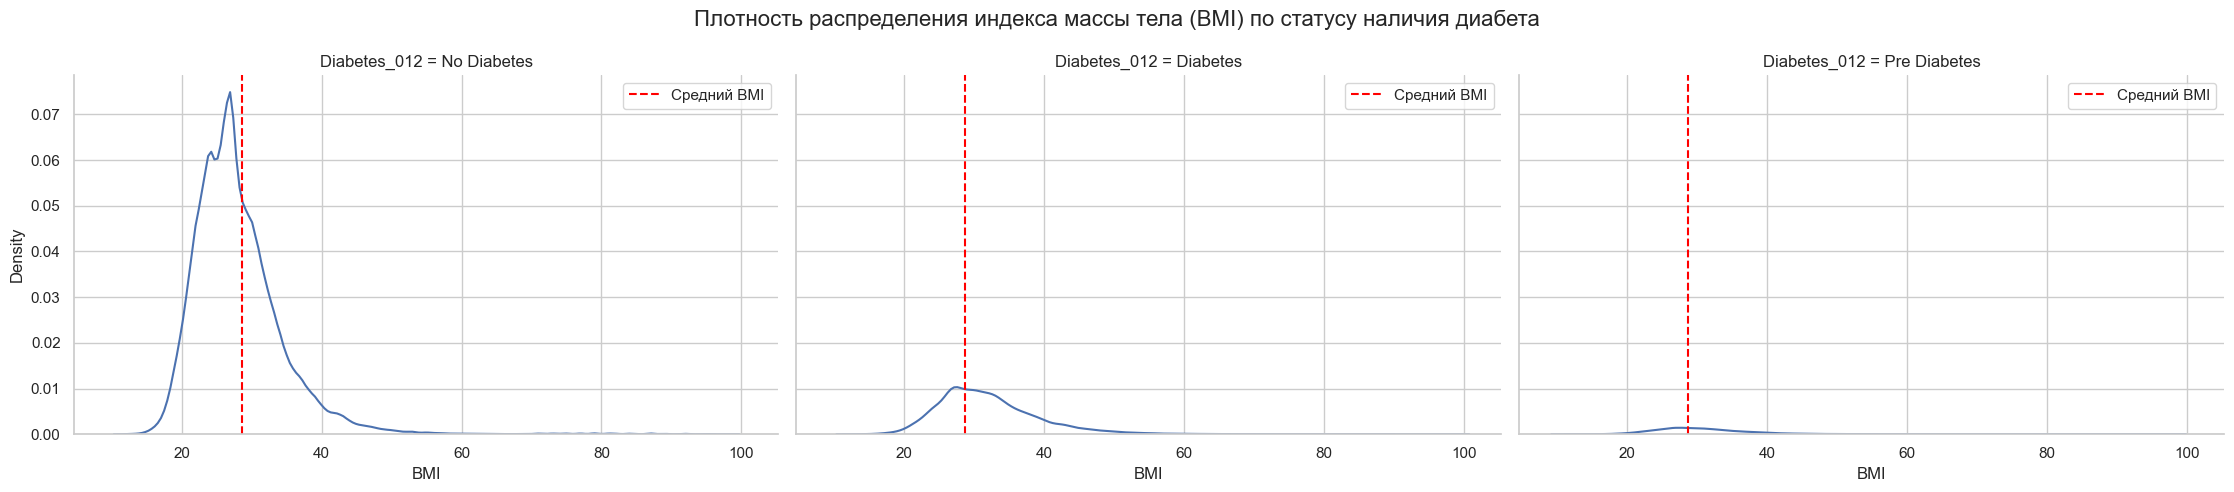

In [144]:
# Вызов функции
plot_density_distribution(df_vis, 'BMI', 'Diabetes_012', "Плотность распределения индекса массы тела (BMI) по статусу наличия диабета")

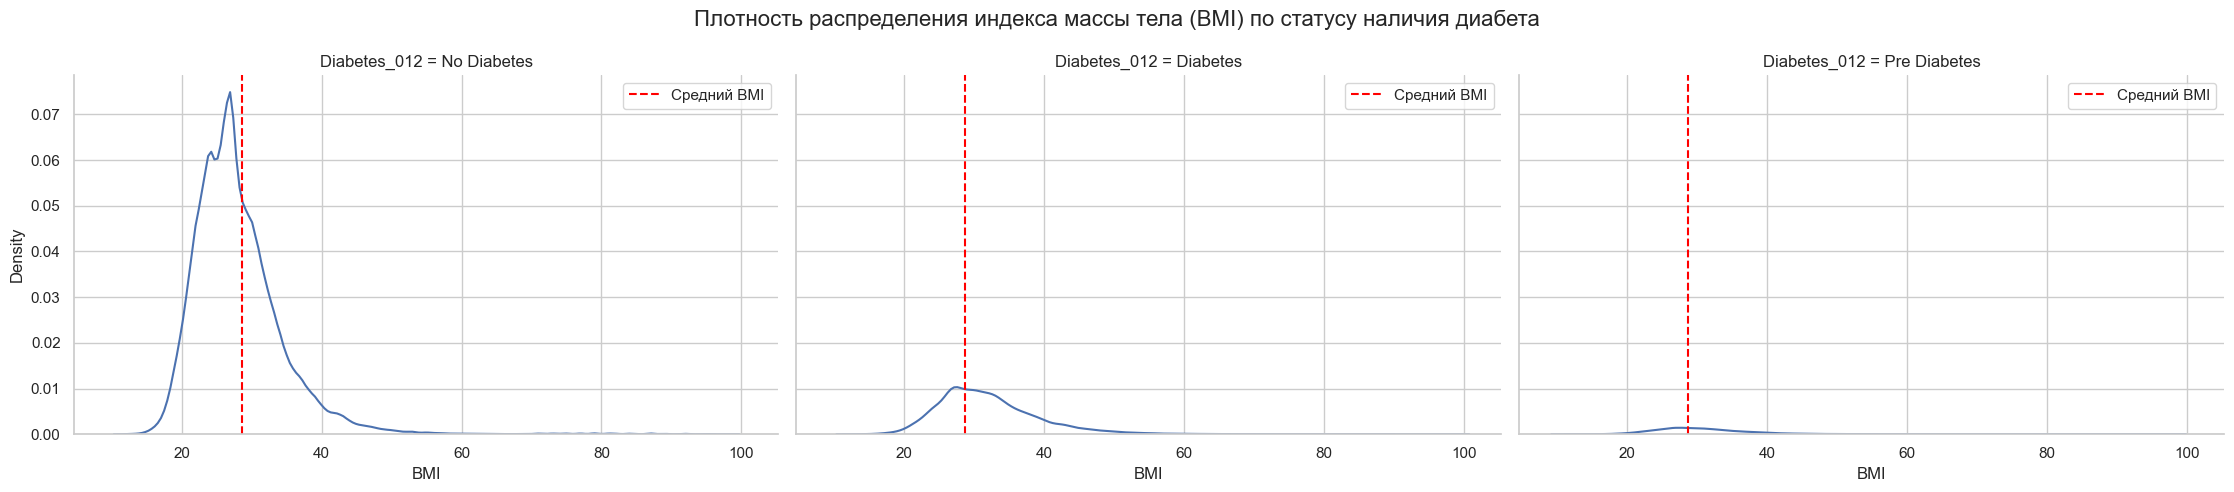

In [145]:
# Установка стиля
sns.set(style="whitegrid")

# Создание графика
g = sns.displot(x='BMI', col='Diabetes_012', data=df_vis, kind="kde", palette="pastel", height=5, aspect=1.5)

# Добавление заголовка
g.fig.suptitle("Плотность распределения индекса массы тела (BMI) по статусу наличия диабета", fontsize=16)
plt.subplots_adjust(top=0.85)  # Увеличьте пространство для заголовка

# Добавление вертикальной линии для среднего значения
mean_bmi = df_vis['BMI'].mean()
for ax in g.axes.flat:
    ax.axvline(mean_bmi, color='red', linestyle='--', label='Средний BMI')
    ax.legend()

plt.show()

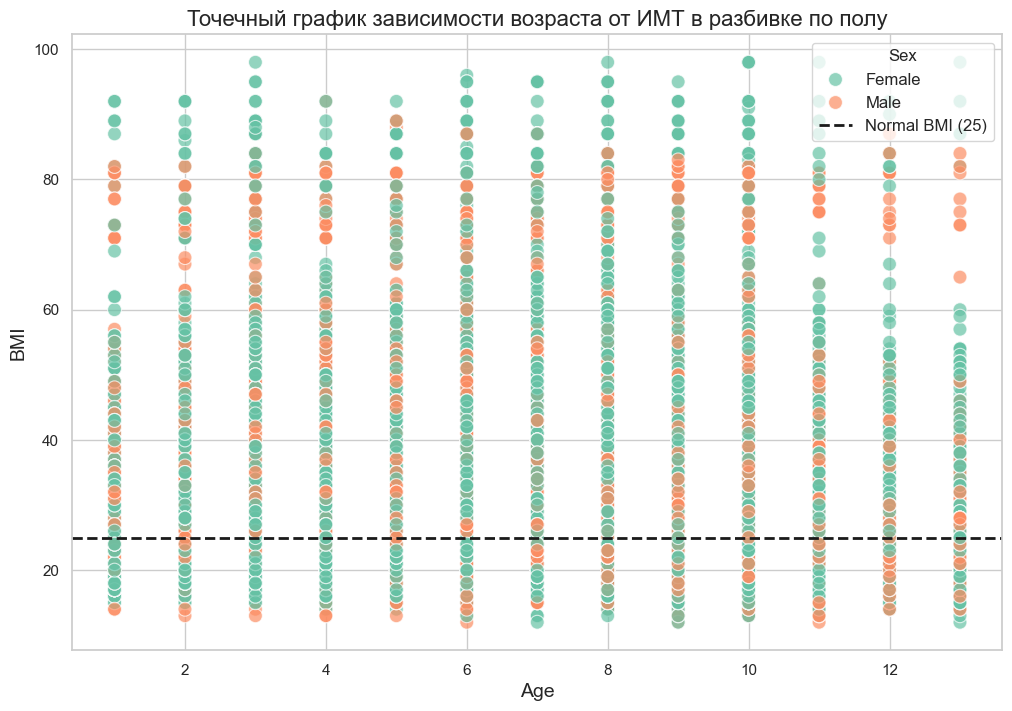

In [146]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=df_vis, x='Age', y='BMI', hue='Sex', palette='Set2', s=100, alpha=0.7)

plt.axhline(y=25, linewidth=2, color='k', linestyle='--', label='Normal BMI (25)')

# titles and labels
plt.title("Точечный график зависимости возраста от ИМТ в разбивке по полу", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("BMI", fontsize=14)

plt.legend(title='Sex', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

# Вывод: большинство людей из датасета имеют BMI выше нормы (25)

# Разделим людей на группы по BMI (Вес ниже нормы, Нормальный вес, Избыточный вес, Ожирение)

In [147]:
BMI=pd.cut( data['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [148]:
dd=pd.crosstab(df_vis['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(int)
dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,169,5350,11419,18118
No Diabetes,2856,67462,68505,50998
Pre Diabetes,28,924,1631,2042


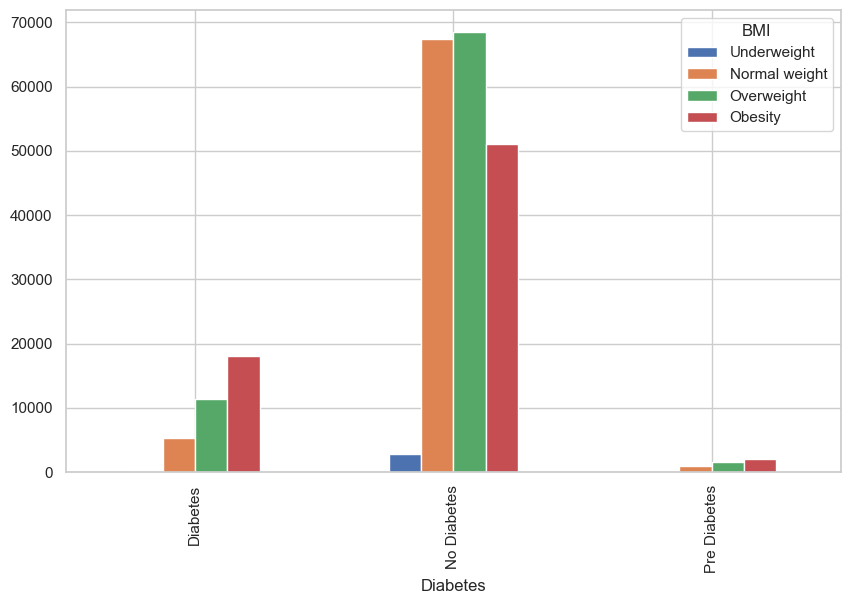

In [149]:
dd.plot(kind="bar",figsize=(10,6));

# Возраст. Поделим по группам

In [150]:
age = pd.cut(df_vis['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 229781, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 800x600 with 0 Axes>

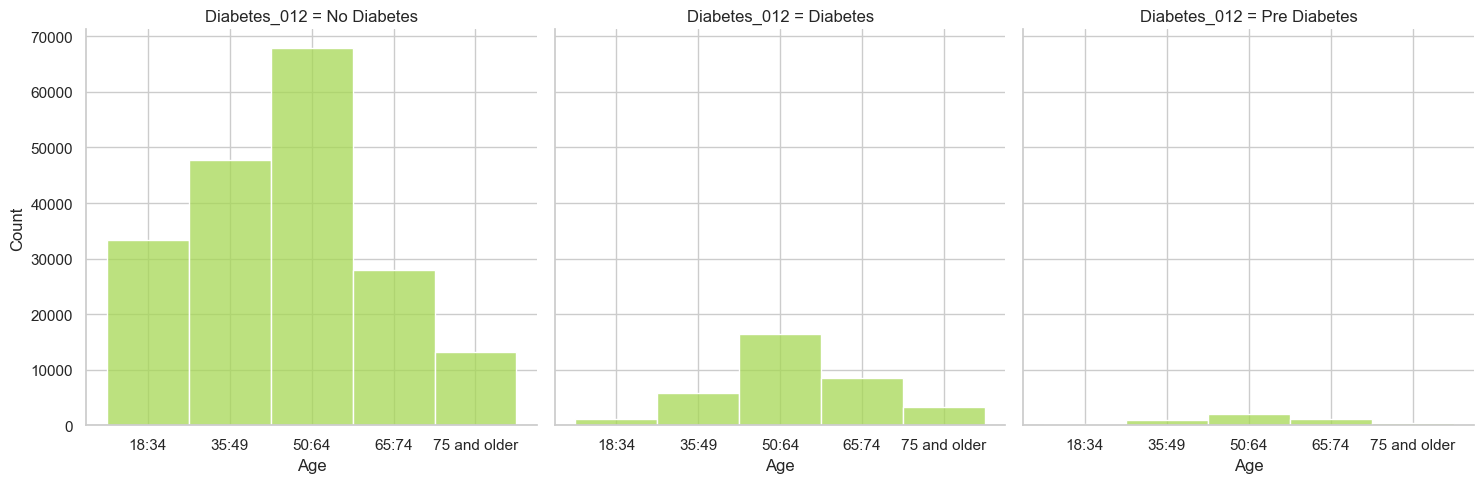

In [151]:
plt.figure(figsize=(8,6))
sns.displot(data=df_vis,col='Diabetes_012',x=age,color='#a6d854');

# Люди в возрасте от 50 до 64 лет имеют более высокий риск развития диабета

# PhysHlth

<Figure size 1200x500 with 0 Axes>

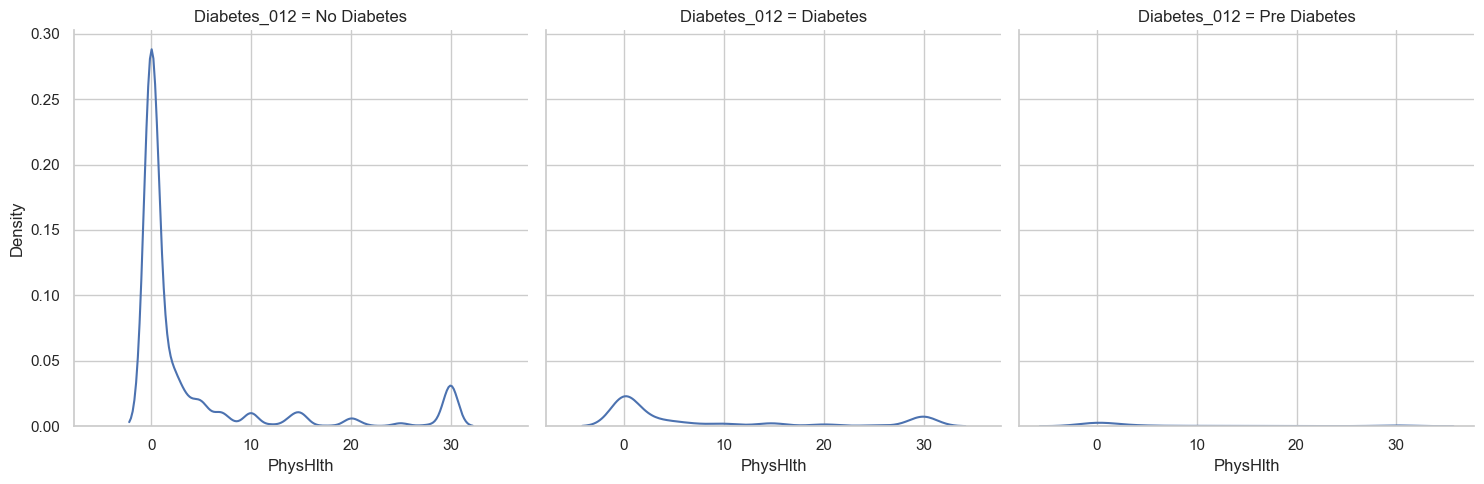

In [152]:
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='Diabetes_012' , data = df_vis, kind="kde")
plt.show()

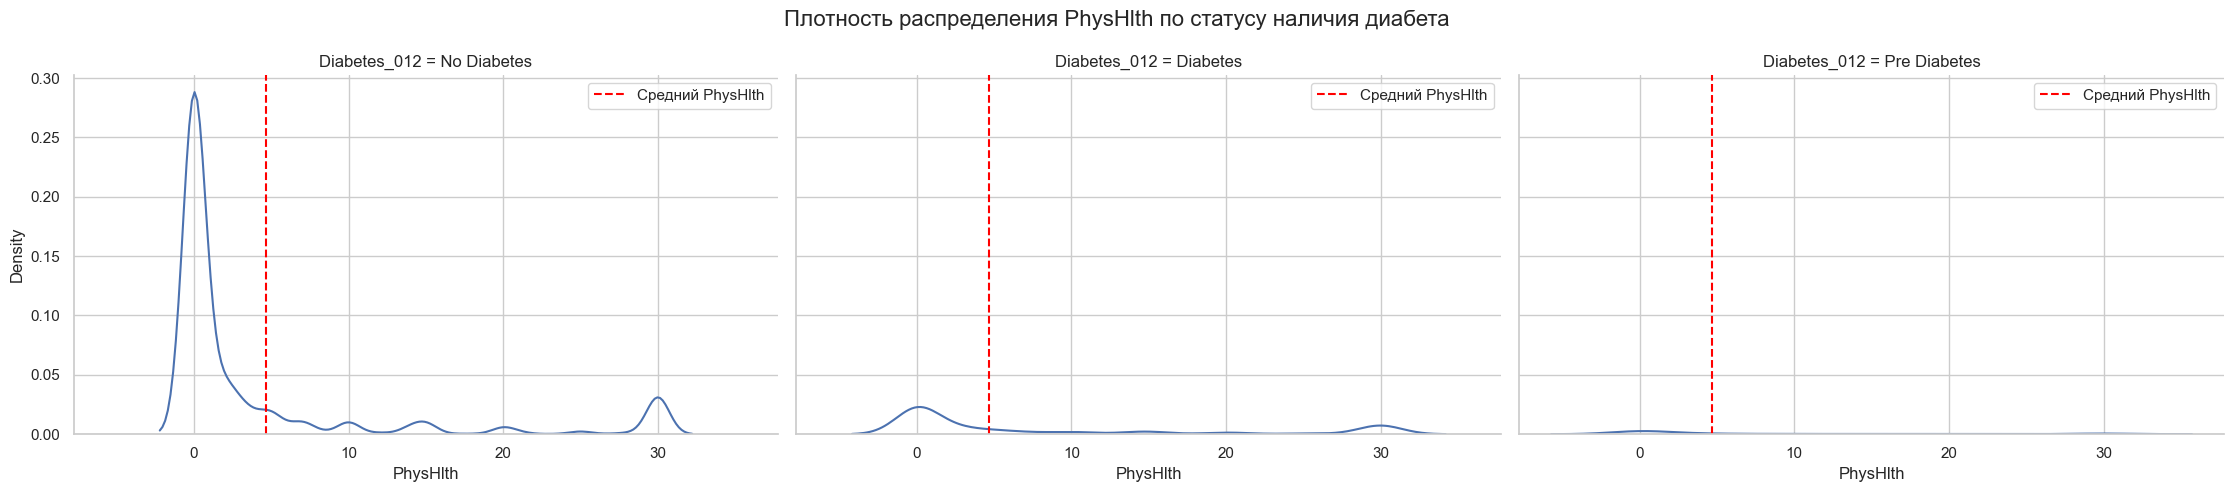

In [153]:
# Вызов функции
plot_density_distribution(df_vis, 'PhysHlth', 'Diabetes_012', "Плотность распределения PhysHlth по статусу наличия диабета")

# MentHlth

<Figure size 1200x500 with 0 Axes>

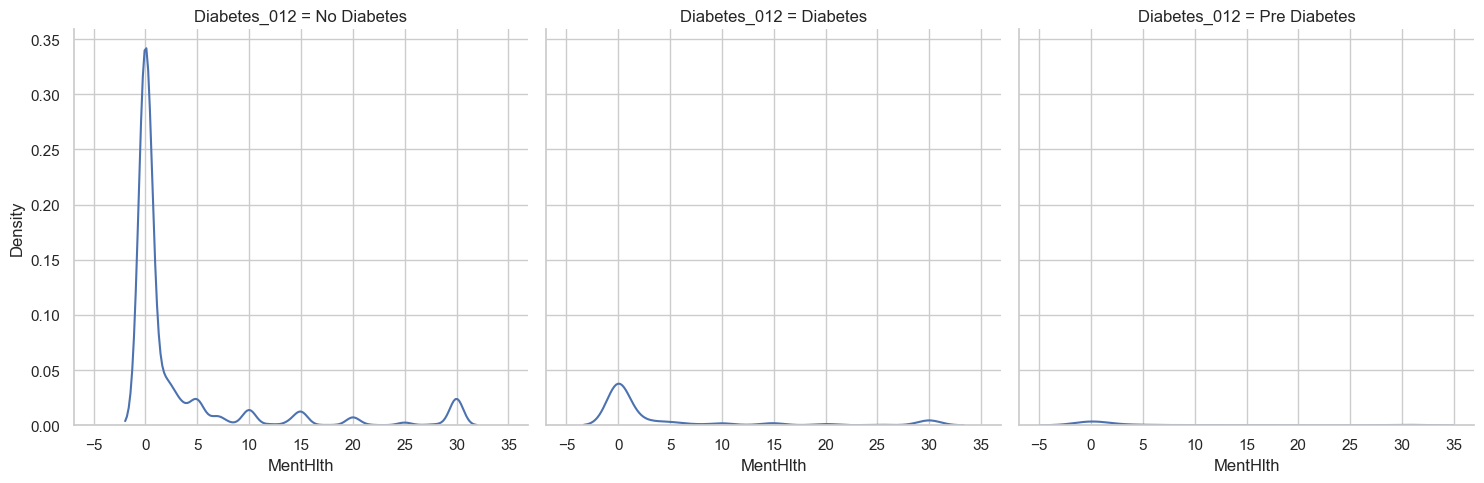

In [154]:
plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='Diabetes_012', data = df_vis, kind="kde")
plt.show()

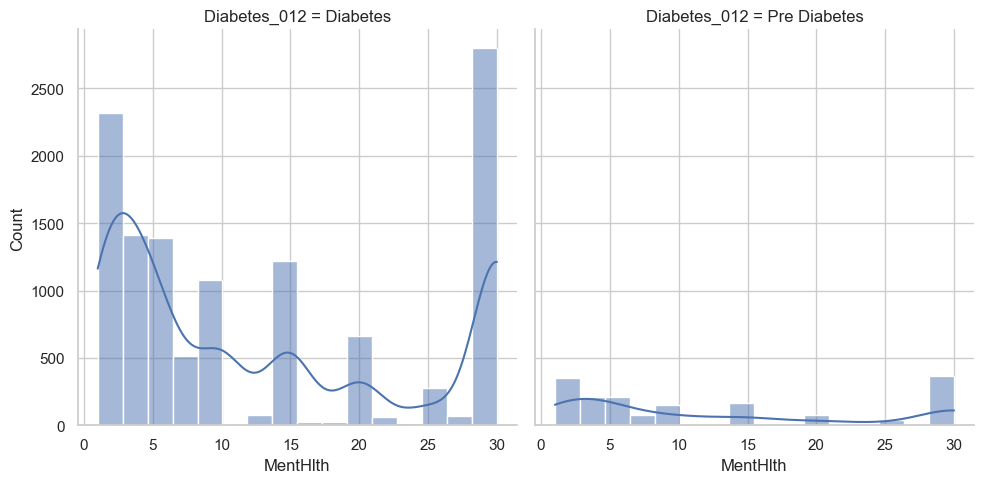

In [155]:
sns.displot(data=df_vis.loc[(df_vis['MentHlth']>0)&(df_vis['Diabetes_012']!="No Diabetes")],x='MentHlth',col='Diabetes_012',col_wrap=2,kde=True);

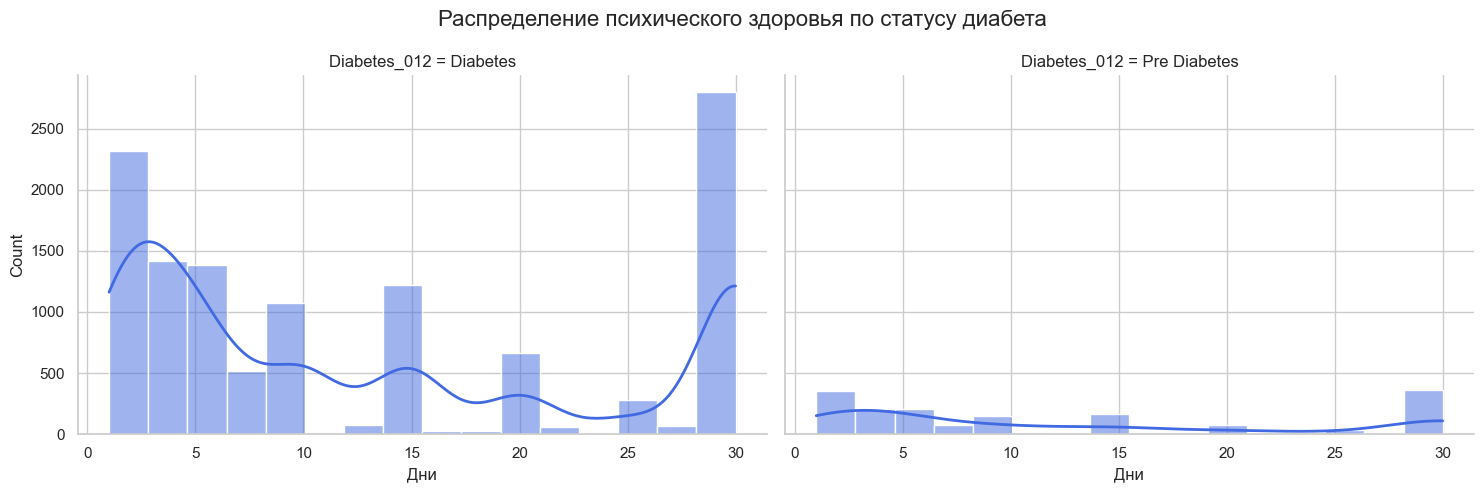

In [156]:
def plot_distribution(data, feature, hue, title):
    sns.set(style="whitegrid")# Установка стиля

    # Фильтрация данных
    filtered_data = data.loc[(data[feature] > 0) & (data[hue] != "No Diabetes")]

    # Создание графика
    g = sns.displot(
        data=filtered_data,
        x=feature,
        col=hue,
        col_wrap=2,
        kde=True,
        color='royalblue',  # Яркий цвет для графиков
        height=5,
        aspect=1.5
    )

    # Настройка линий KDE
    for ax in g.axes.flat:
        for line in ax.lines:
            line.set_linewidth(2)  # Установка жирности линий

    # Добавление заголовка и меток осей
    g.fig.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.85)  # Увеличьте пространство для заголовка
    for ax in g.axes.flat:
        ax.set_xlabel("Дни", fontsize=12)  # Подпись оси X

    plt.show()

# Вызов функции
plot_distribution(df_vis, 'MentHlth', 'Diabetes_012', "Распределение психического здоровья по статусу диабета")

# Психическое здоровье не влияет на диабет

# GenHlth

# Общее здоровье оказывает влияние на диабет

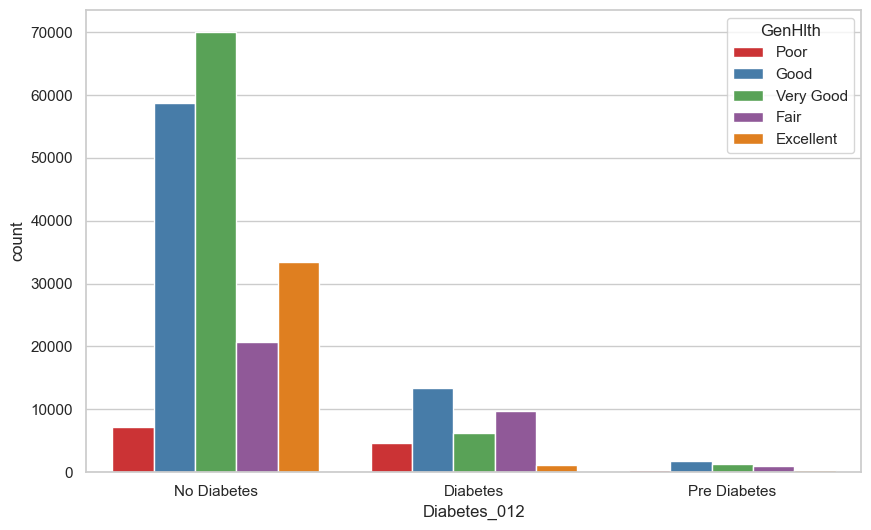

In [157]:
def plot_count_distribution(data, x_feature, hue_feature):
    """
    Функция для построения графика распределения с использованием countplot.

    Parameters:
    - data: DataFrame с данными.
    - x_feature: строка с названием признака для оси X.
    - hue_feature: строка с названием переменной для разделения.
    """
    # Создание фигуры с заданными размерами
    plt.figure(figsize=(10, 6))

    # Построение графика countplot
    sns.countplot(data=data, x=x_feature, hue=hue_feature, palette='Set1')

    # Отображение графика
    plt.show()

# Вызов функции 
plot_count_distribution(df_vis, 'Diabetes_012', 'GenHlth')

# Income ( не оказывает)

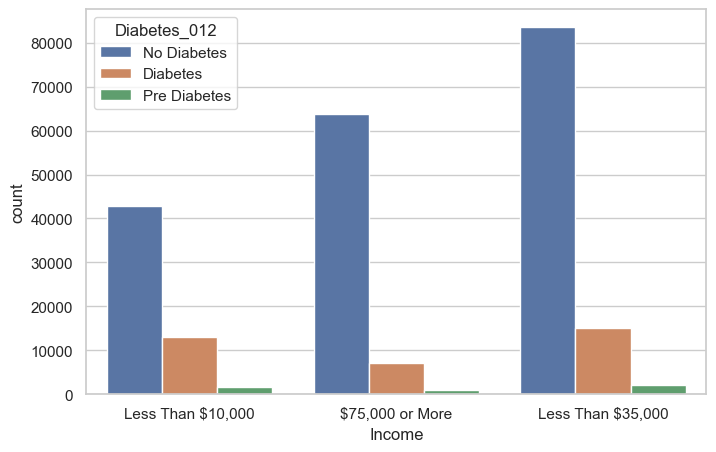

In [158]:
def plot_income_distribution(data, x_feature, hue_feature):
    """
    Функция для построения графика распределения с использованием countplot.

    Parameters:
    - data: DataFrame с данными.
    - x_feature: строка с названием признака для оси X.
    - hue_feature: строка с названием переменной для разделения.
    """
    # Создание фигуры с заданными размерами
    plt.figure(figsize=(8, 5))

    # Построение графика countplot
    sns.countplot(x=x_feature, hue=hue_feature, data=data)

    # Отображение графика
    plt.show()

# Вызов функции
plot_income_distribution(df_vis, 'Income', 'Diabetes_012')

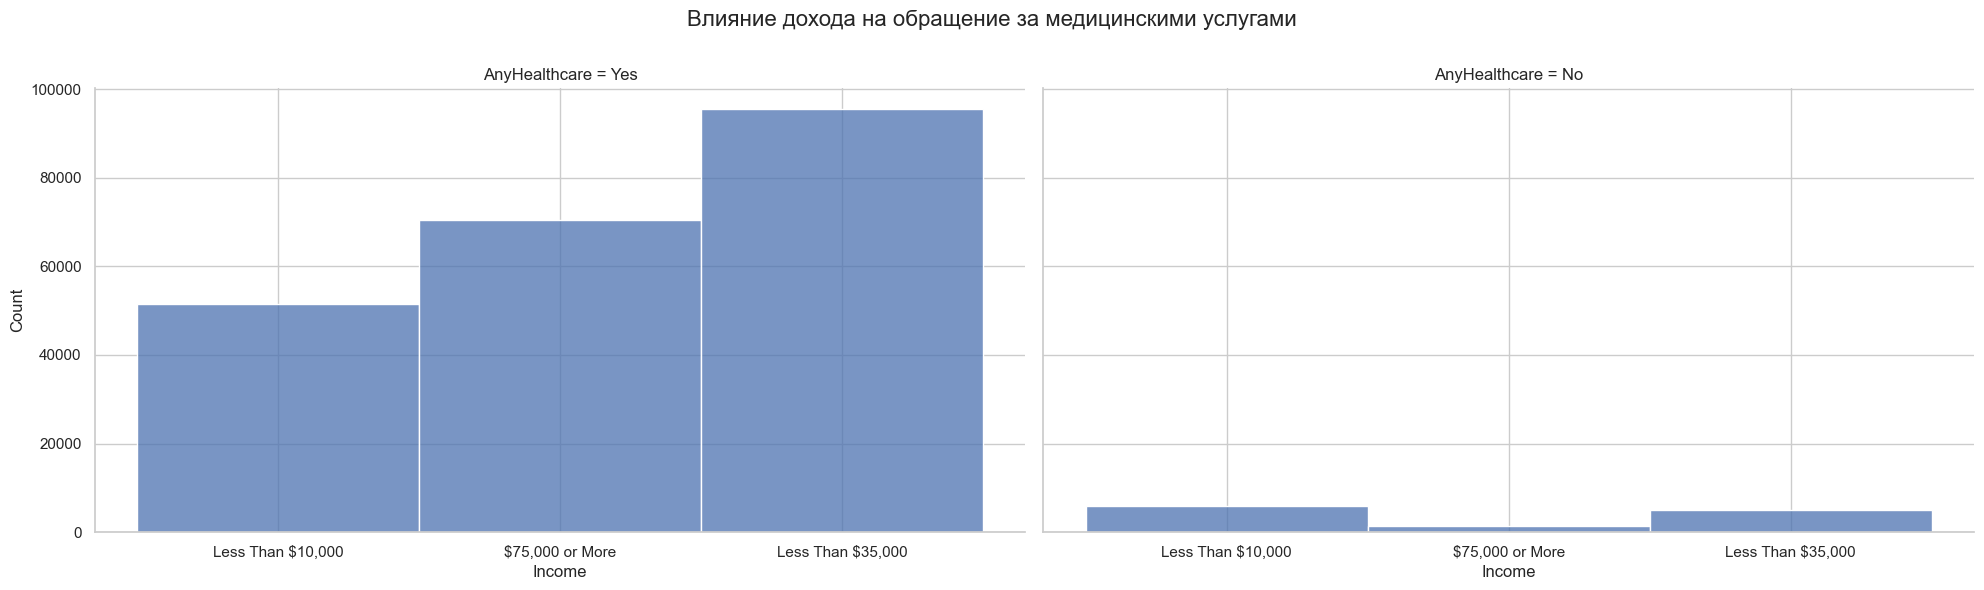

In [159]:
# Влияние дохода на обращение за мед.услугами . Вывод:чем больший доход, тем больше хорошее медицинское обслуживание
def plot_income_healthcare_distribution(data, x_feature, col_feature, figsize=(10, 6)):
    """
    Функция для построения графика распределения с использованием displot.

    Parameters:
    - data: DataFrame с данными.
    - x_feature: строка с названием признака для оси X.
    - col_feature: строка с названием переменной для разделения по столбцам.
    - figsize: кортеж с размерами фигуры (ширина, высота).
    """
    # Создание графика
    g = sns.displot(data=data, x=x_feature, col=col_feature, height=figsize[1], aspect=figsize[0]/figsize[1])

    # Настройка заголовка
    g.fig.suptitle("Влияние дохода на обращение за медицинскими услугами", fontsize=16)
    plt.subplots_adjust(top=0.85)  # Увеличьте пространство для заголовка

    plt.show()

# Вызов функции
plot_income_healthcare_distribution(df_vis, 'Income', 'AnyHealthcare')

# Education Образование

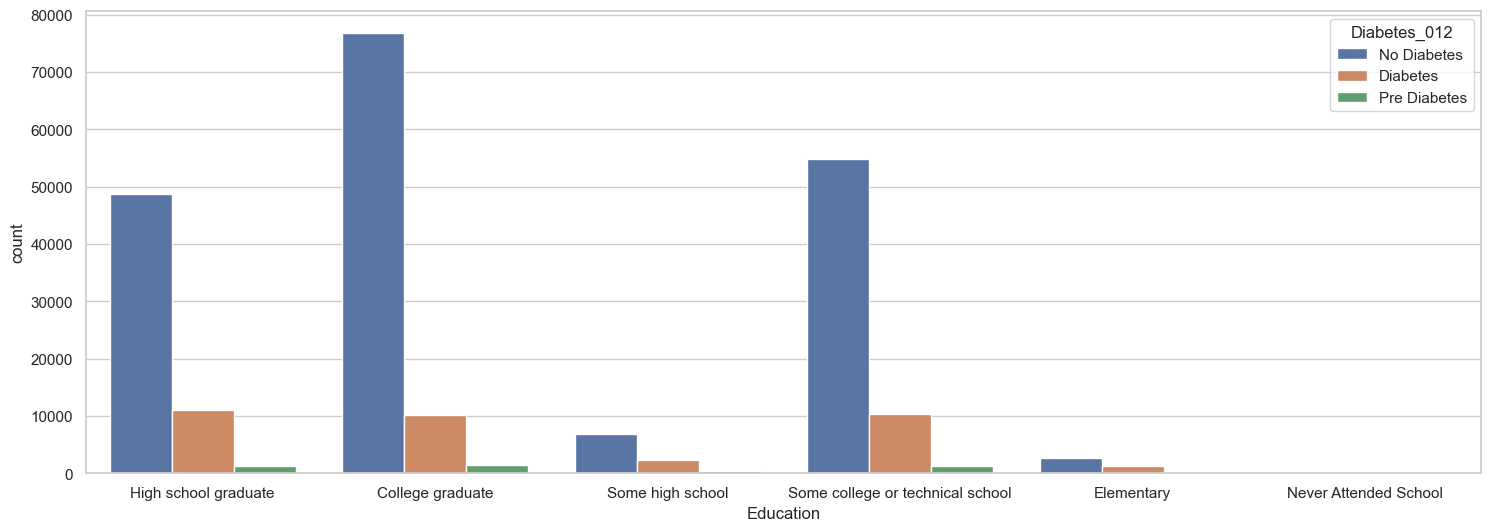

In [160]:
plt.figure(figsize=(18,6))
sns.countplot(x='Education', hue='Diabetes_012' , data = df_vis)
plt.show()

# Veggies

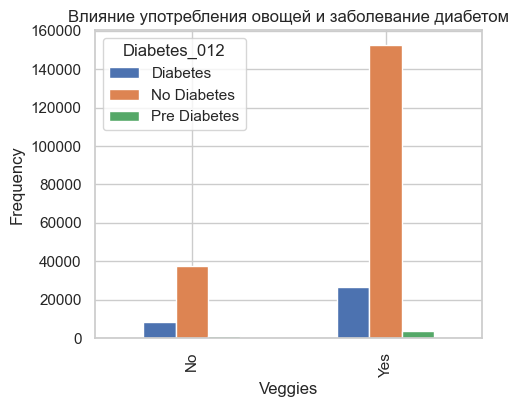

In [161]:
def plot_crosstab_bar(data, feature1, feature2, title, figsize=(5, 4)):
    """
    Функция для построения столбчатой диаграммы на основе кросс-табуляции.

    Parameters:
    - data: DataFrame с данными.
    - feature1: строка с названием первого признака (например, "Veggies").
    - feature2: строка с названием второго признака (например, "Diabetes_012").
    - title: заголовок графика.
    - figsize: кортеж с размерами фигуры (ширина, высота).
    """
    # Создание кросс-табуляции и построение графика
    pd.crosstab(data[feature1], data[feature2]).plot(kind="bar", figsize=figsize)

    # Настройка заголовка и меток осей
    plt.title(title)
    plt.xlabel(feature1)
    plt.ylabel('Frequency')
    
    # Отображение графика
    plt.show()

# Пример использования функции
plot_crosstab_bar(df_vis, 'Veggies', 'Diabetes_012', 'Влияние употребления овощей и заболевание диабетом')

# Fruits

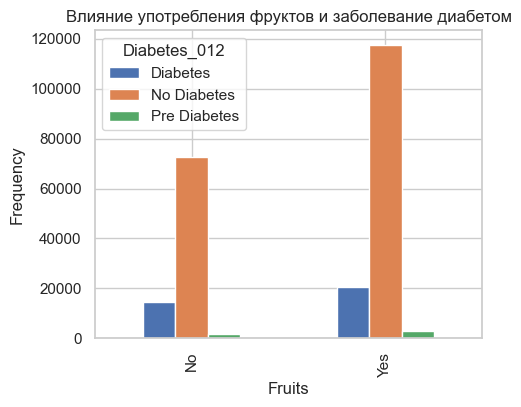

In [162]:
# Вызов функции
plot_crosstab_bar(df_vis, 'Fruits', 'Diabetes_012', 'Влияние употребления фруктов и заболевание диабетом')

# PhysActivity

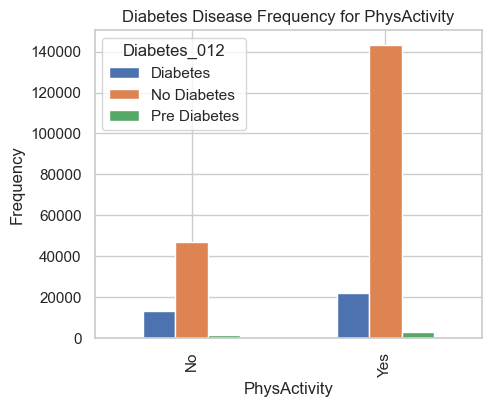

In [163]:
pd.crosstab(df_vis.PhysActivity,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='PhysActivity', ylabel='count'>

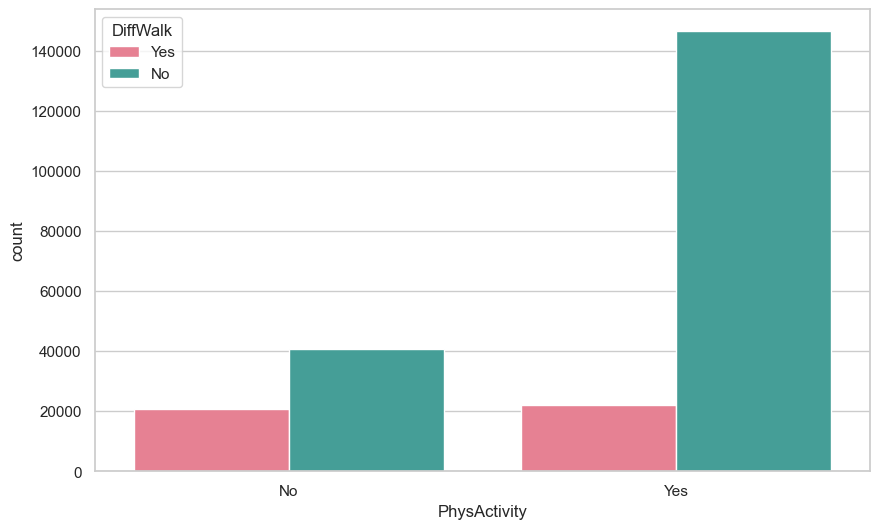

In [164]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_vis,x=df_vis['PhysActivity'],hue='DiffWalk',palette='husl')

<Figure size 1400x600 with 0 Axes>

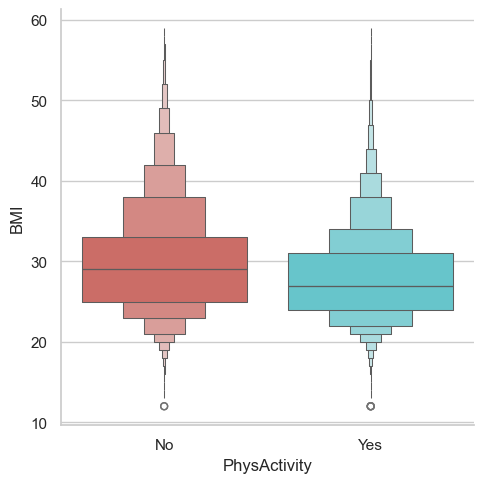

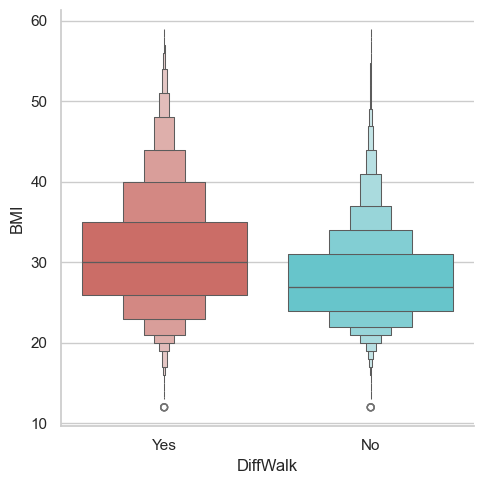

In [165]:
plt.figure(figsize = (14,6))
# plt.subplot(1, 1, 1)
x=sns.catplot(data=df_vis[df_vis['BMI']<60],x="PhysActivity", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

y=sns.catplot(data=df_vis[df_vis['BMI']<60],x="DiffWalk", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()


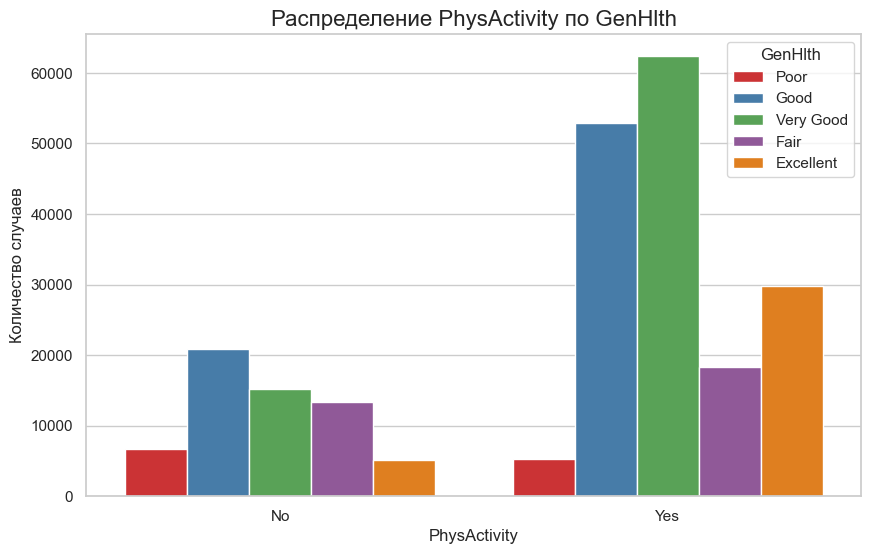

In [166]:
def plot_count_activity_health(data, x_feature, hue_feature, figsize=(10, 6)):
    """
    Функция для построения графика распределения с использованием countplot.

    Parameters:
    - data: DataFrame с данными.
    - x_feature: строка с названием признака для оси X (например, "PhysActivity").
    - hue_feature: строка с названием переменной для разделения (например, "GenHlth").
    - figsize: кортеж с размерами фигуры (ширина, высота).
    """
    plt.figure(figsize=figsize)

    sns.countplot(data=data, x=x_feature, hue=hue_feature, palette='Set1')

    # Настройка заголовка и меток осей
    plt.title(f'Распределение {x_feature} по {hue_feature}', fontsize=16)
    plt.xlabel(x_feature, fontsize=12)
    plt.ylabel('Количество случаев', fontsize=12)

    # Отображение графика
    plt.show()

# Вызов использования функции
plot_count_activity_health(df_vis, 'PhysActivity', 'GenHlth')

# Вывод: физическая активность влияет на общее здоровье, поскольку люди, занимающиеся физическими упражнениями, имеют намного лучшее общее состояние здоровья

# Итоги по визуализации:
1: мужчины и женщины одинаково уязвимы для диабета.
2: люди старше 45 лет более уязвимы для диабета, чем молодые.с увеличением возраста увеличивается и число людей, страдающих диабетом.
3. Более половины диабетиков страдают ожирением, почти половина преддиабетиков страдают ожирением.
4. процент диабетиков и преддиабетиков, страдающих ожирением и избыточным весом, намного выше, чем процент недиабетиков, страдающих ожирением и избыточным весом
5: когда уровень образования повышается, число людей, страдающих диабетом, сокращается.
6: у людей с более низким доходом риск развития диабета выше, чем у людей с более высоким доходом.
7: питание оказывает влияние (потребление овощей и фруктов снижает риск диабета)
8: Физическая активность снижает риск развития диабета.


# Preprocessing // Предварительная подготовка данных

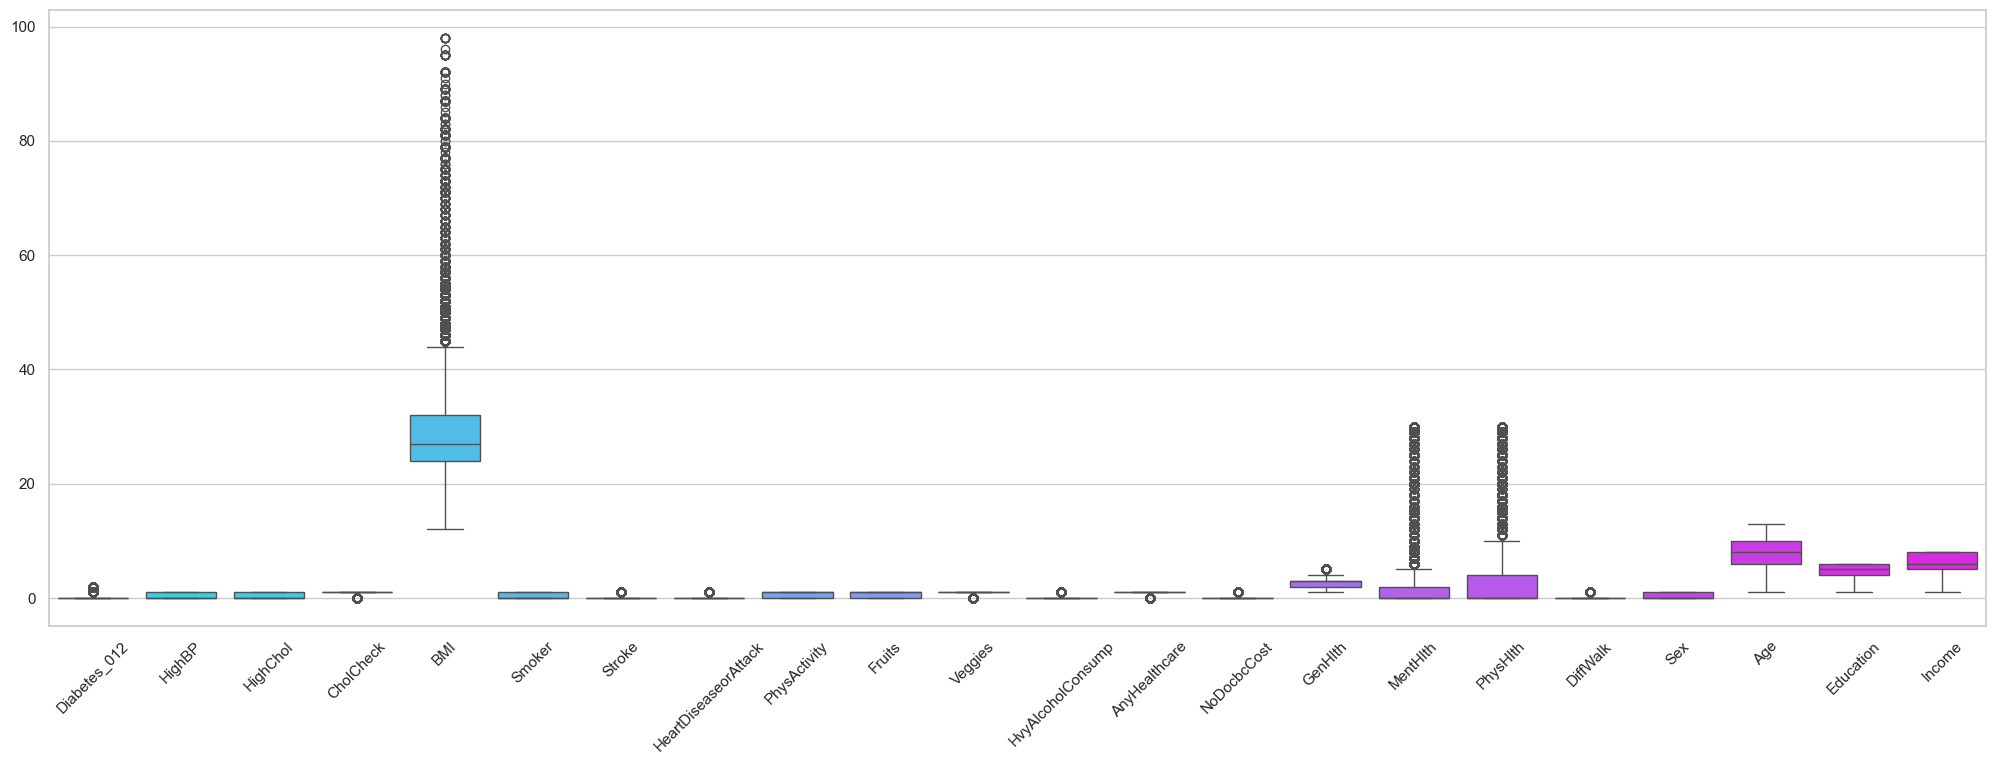

In [167]:
def plot_boxplot(data, figsize=(25, 8), palette='cool', rotation=45):
    """
    Функция для построения boxplot.

    Parameters:
    - data: DataFrame или массив данных для построения графика.
    - figsize: Размер фигуры (ширина, высота).
    - palette: Цветовая палитра для графика.
    - rotation: Угол поворота меток на оси X.
    """
    plt.figure(figsize=figsize)  # Установка размера фигуры
    u = sns.boxplot(palette=palette, data=data)  # Построение ящичного графика
    u.set_xticklabels(u.get_xticklabels(), rotation=rotation)  # Поворот меток на оси X
    plt.show()  # Отображение графика

# Вызов функции
plot_boxplot(data)

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

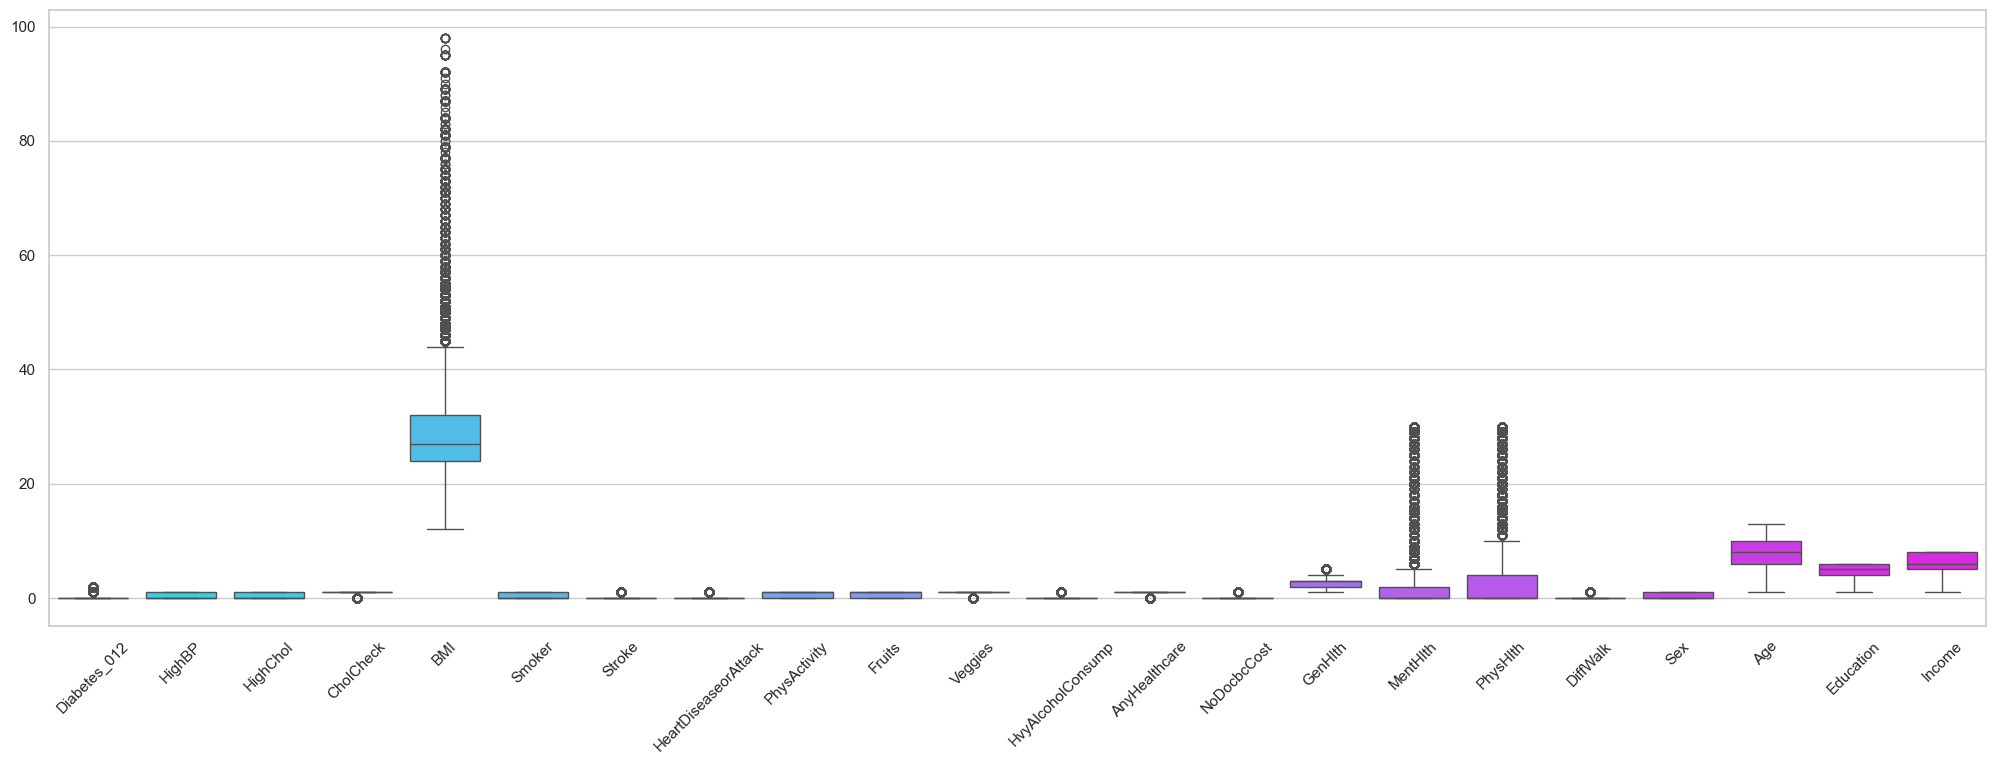

In [168]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

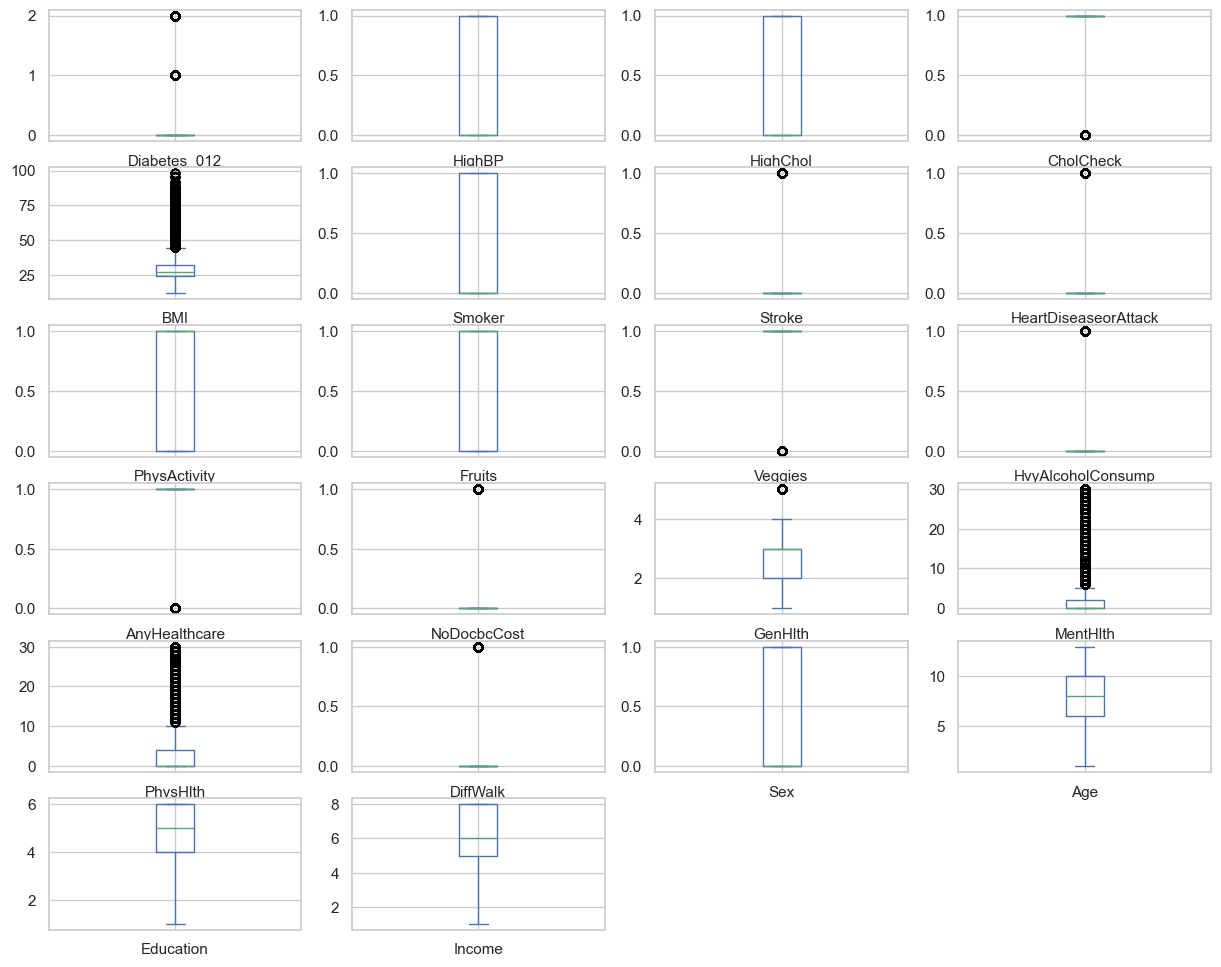

In [169]:
data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

# Рассмотрим выбросы по BMI

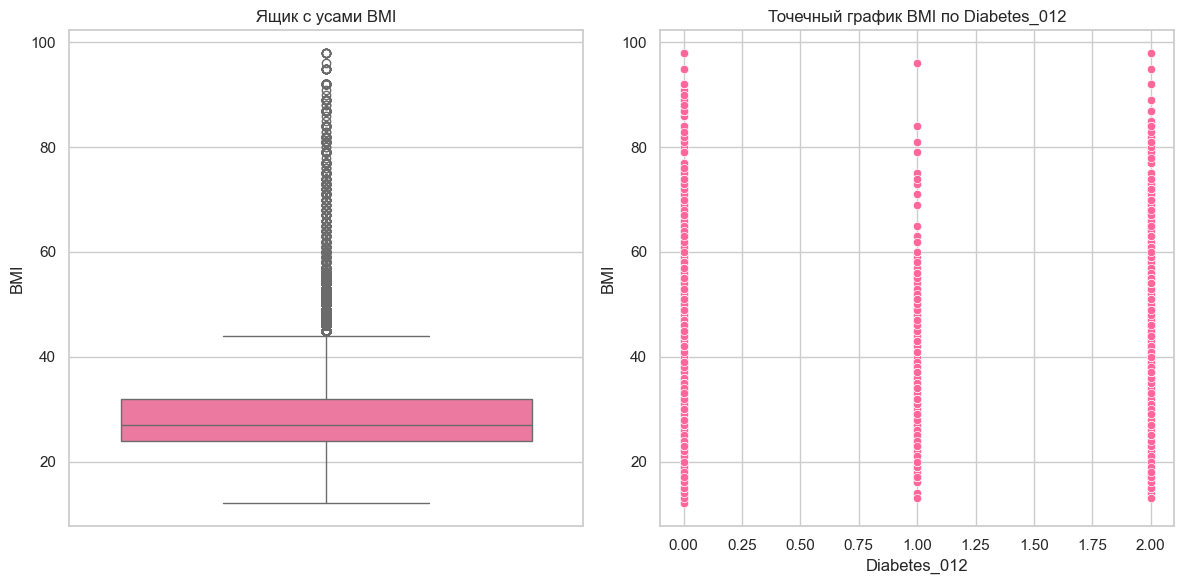

In [170]:
def plot_boxplot_scatter(data, y, figsize=(12, 6), box_color='#ff6699', scatter_color='#ff6699'):
    """
    Функция для построения ящичного графика и точечного графика для анализа заданного столбца.

    Parameters:
    - data: DataFrame с данными, содержащими указанный столбец y и 'Diabetes_012'.
    - y: Название столбца для ящичного графика и оси Y точечного графика.
    - figsize: Размер фигуры (ширина, высота).
    - box_color: Цвет ящичного графика.
    - scatter_color: Цвет точечного графика.
    """
    plt.figure(figsize=figsize)  # Установка размера фигуры

    # Ящичный график
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, y=y, color=box_color)
    plt.title(f'Ящик с усами {y}')  

    # Точечный график
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x='Diabetes_012', y=y, color=scatter_color)
    plt.title(f'Точечный график {y} по Diabetes_012')  

    plt.tight_layout()  # Автоматическая настройка отступов
    plt.show()  # Отображение графиков

# Вызов функции
plot_boxplot_scatter(data, y='BMI')

In [171]:
x=data[data['BMI']>=70]
x.shape

(599, 22)

In [172]:
data.shape

(229781, 22)

In [173]:
df=data.copy()

In [174]:
data.shape

(229781, 22)

In [175]:
df_vis.shape

(229781, 22)

In [176]:
# Получение статистики по BMI
stats_BMI= df['BMI'].describe()
print(stats_BMI)

count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64


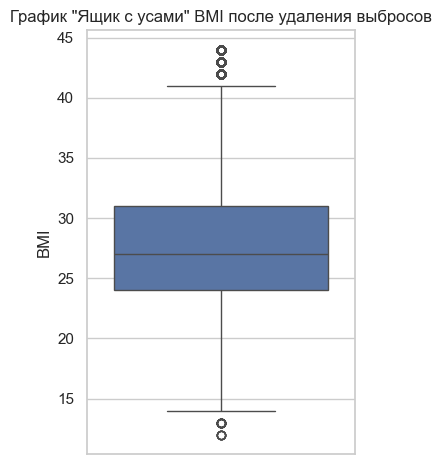

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [177]:
def remove_outliers(df, column, figsize=(12, 6)):
    """
    Функция для удаления выбросов из заданного столбца DataFrame с использованием метода IQR.
    
    Parameters:
    - df: DataFrame с данными.
    - column: Название столбца, из которого нужно удалить выбросы.
    - figsize: Размер фигуры для графиков.
    
    Returns:
    - None: Очищенный DataFrame сохраняется в том же объекте df.
    """
    # Вычисление Q1, Q3 и IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определение границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Удаление выбросов
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

    # Ящичный график после удаления выбросов
    plt.subplot(1, 2, 2)
    plt.title(f'График "Ящик с усами" {column} после удаления выбросов')
    sns.boxplot(data=df, y=column)

    plt.tight_layout()  # Автоматическая настройка отступов
    plt.show()  # Отображение графиков

    return df  # Возврат очищенного DataFrame
    
# Вызов функции
remove_outliers(df, 'BMI')

In [178]:
# Получение статистики по BMI
stats_BMI= df['BMI'].describe()
print(stats_BMI)

count    224143.000000
mean         28.077214
std           5.410090
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          44.000000
Name: BMI, dtype: float64


In [179]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    186589
2.0     33101
1.0      4453
Name: count, dtype: int64

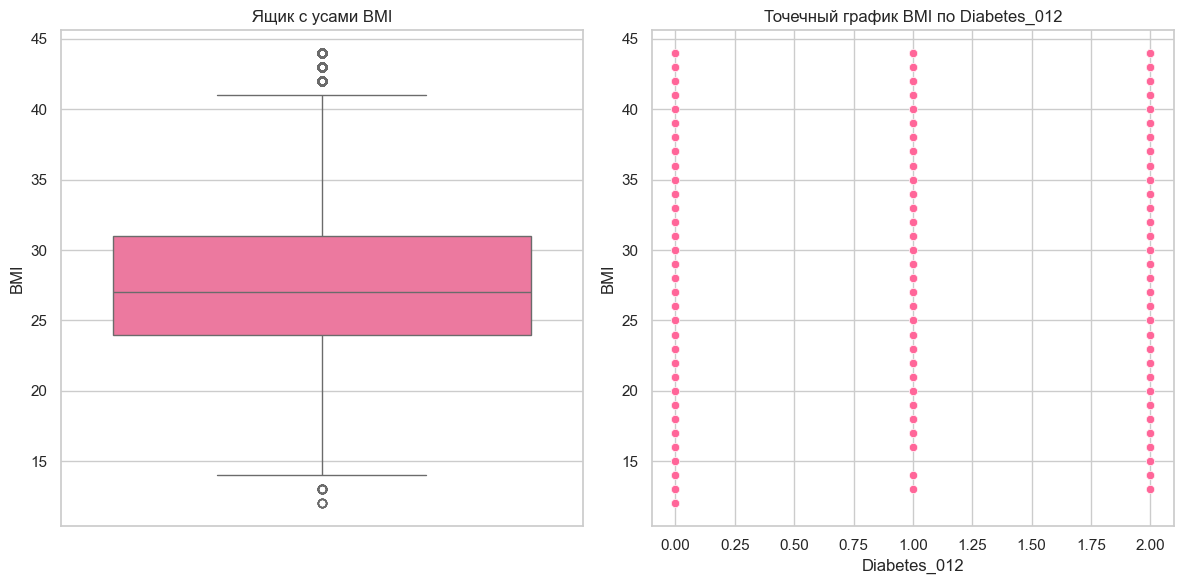

In [180]:
# Вызов функции
plot_boxplot_scatter(df, y='BMI')

# Очень важный шаг в принятии решений об удалении выбросов
df=data[data['BMI']<70]

# Займемся определением выбросов аномалий

from sklearn.ensemble import IsolationForest # Импортируем класс IsolationForest из библиотеки sklearn.ensemble
model = IsolationForest() # Создаем экземпляр модели IsolationForest

# Обучаем модель на данных из DataFrame df
model.fit(df)

# Вычисляем аномальные оценки для каждого наблюдения в df
# df['anomailes_scores'] = model.decision_function(df)

# Предсказываем аномалии в данных: 1 - нормальные, -1 - аномальные
df['anomaly'] = model.predict(df)

In [206]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что df уже загружен и подготовлен

# Создание экземпляра модели с настройками
model = IsolationForest(n_estimators=100, contamination=0.05)

# Обучение модели на данных из DataFrame df
model.fit(df)

# Предсказание аномалий в данных: 1 - нормальные, -1 - аномальные
df['anomaly'] = model.predict(df)



In [208]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,1
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,-1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,1


# Исключим аномалии (-1)

In [209]:
df[df['anomaly']==-1] # выберем аномалии (каждый раз их колич.меняется)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
21,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,15.0,30.0,1.0,0.0,13.0,2.0,3.0,-1
30,2.0,1.0,1.0,1.0,34.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,7.0,1.0,0.0,9.0,5.0,4.0,-1
50,0.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,10.0,17.0,1.0,0.0,9.0,4.0,1.0,-1
65,0.0,1.0,1.0,1.0,38.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,10.0,5.0,1.0,1.0,11.0,5.0,6.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253630,2.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,30.0,5.0,0.0,1.0,9.0,4.0,5.0,-1
253652,2.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,1.0,11.0,2.0,3.0,-1
253663,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,30.0,0.0,0.0,5.0,6.0,2.0,-1
253668,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,-1


In [210]:
df[df['anomaly']==1].shape 

(202288, 23)

# Drop column(anomaly)

In [211]:
df.drop(df[df['anomaly']==-1].index,inplace = True)

In [212]:
df.shape

(202288, 23)

In [213]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,1
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0,1
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,1


In [214]:
df.shape

(202288, 23)

In [215]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
count,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.000000,202288.00000,202288.000000,202288.000000,202288.0
mean,0.259017,0.425428,0.421088,0.964200,27.884758,0.447955,0.022997,0.068531,0.770945,0.631402,0.818971,0.057883,0.959315,0.059396,2.437980,2.437238,3.172032,0.124308,0.442063,8.05857,5.053226,6.131980,1.0
std,0.657863,0.494409,0.493735,0.185793,5.248055,0.497285,0.149894,0.252656,0.420226,0.482426,0.385043,0.233522,0.197559,0.236364,0.955086,6.064982,7.192081,0.329933,0.496633,3.12613,0.950889,1.947877,0.0
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.0
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.00000,4.000000,5.000000,1.0
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.00000,5.000000,7.000000,1.0
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,1.000000,10.00000,6.000000,8.000000,1.0
max,2.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.00000,6.000000,8.000000,1.0


Logistic Regression - Fold Accuracy: 0.5074398141282317
Logistic Regression - Fold MSE: 0.8906026002273963
Logistic Regression - Fold MAE: 0.6252409906569776
              precision    recall  f1-score   support

         0.0       0.97      0.51      0.67     34851
         1.0       0.03      0.50      0.05       735
         2.0       0.31      0.48      0.38      4872

    accuracy                           0.51     40458
   macro avg       0.44      0.50      0.37     40458
weighted avg       0.87      0.51      0.62     40458

KNN - Fold Accuracy: 0.5813683325918236
KNN - Fold MSE: 1.2689208561965495
KNN - Fold MAE: 0.7020613970043007
              precision    recall  f1-score   support

         0.0       0.94      0.59      0.72     34851
         1.0       0.02      0.15      0.04       735
         2.0       0.22      0.61      0.32      4872

    accuracy                           0.58     40458
   macro avg       0.39      0.45      0.36     40458
weighted avg       0.83  

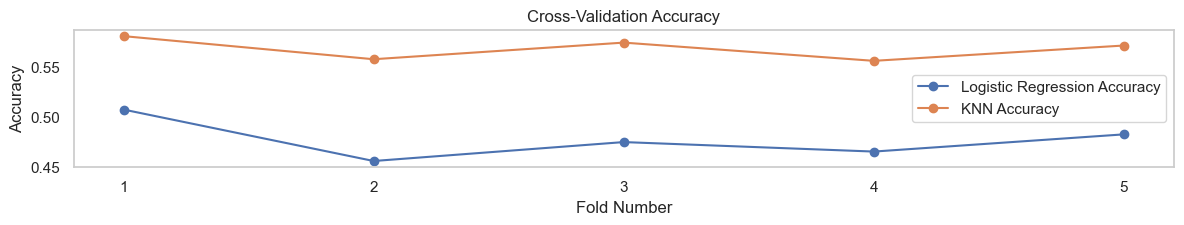

In [225]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt


# Замените 'target' на имя вашей целевой переменной
X = df.drop(columns=['Diabetes_012'])  # Признаки
y = df['Diabetes_012']  # Целевая переменная

# Инициализация стратифицированной кросс-валидации
skf = StratifiedKFold(n_splits=5)

# Списки для хранения результатов
results_logistic_accuracy = []
results_logistic_mse = []
results_logistic_mae = []

results_knn_accuracy = []
results_knn_mse = []
results_knn_mae = []

# Кросс-валидация для обеих моделей
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Масштабирование данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Балансировка классов с использованием SMOTE + ENN
    smt_enn = SMOTEENN()
    X_resampled, y_resampled = smt_enn.fit_resample(X_train_scaled, y_train)

    # Логистическая регрессия
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_resampled, y_resampled)
    
    # Предсказание и оценка модели на тестовой выборке
    y_pred_logistic = logistic_model.predict(X_test_scaled)
    
    # Оценка точности и вывод метрик для логистической регрессии
    accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
    mse_logistic = mean_squared_error(y_test, y_pred_logistic)
    mae_logistic = mean_absolute_error(y_test, y_pred_logistic)

    results_logistic_accuracy.append(accuracy_logistic)
    results_logistic_mse.append(mse_logistic)
    results_logistic_mae.append(mae_logistic)

    print(f'Logistic Regression - Fold Accuracy: {accuracy_logistic}')
    print(f'Logistic Regression - Fold MSE: {mse_logistic}')
    print(f'Logistic Regression - Fold MAE: {mae_logistic}')
    print(classification_report(y_test, y_pred_logistic))
    
    # KNN
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_resampled, y_resampled)
    
    # Предсказание и оценка модели на тестовой выборке
    y_pred_knn = knn_model.predict(X_test_scaled)
    
    # Оценка точности и вывод метрик для KNN
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    mae_knn = mean_absolute_error(y_test, y_pred_knn)

    results_knn_accuracy.append(accuracy_knn)
    results_knn_mse.append(mse_knn)
    results_knn_mae.append(mae_knn)

    print(f'KNN - Fold Accuracy: {accuracy_knn}')
    print(f'KNN - Fold MSE: {mse_knn}')
    print(f'KNN - Fold MAE: {mae_knn}')
    print(classification_report(y_test, y_pred_knn))



In [227]:
# Вывод размеров выборок
print(f'Размер обучающей выборки: {X_train_scaled.shape[0]}')
print(f'Размер тестовой выборки: {X_test_scaled.shape[0]}')

Размер обучающей выборки: 161831
Размер тестовой выборки: 40457


In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85     34850
         1.0       0.04      0.02      0.02       735
         2.0       0.28      0.62      0.39      4872

    accuracy                           0.75     40457
   macro avg       0.42      0.47      0.42     40457
weighted avg       0.83      0.75      0.78     40457



# Масштабирование данных (Scaling data)

In [ ]:
x = df.drop(['Diabetes_012'],axis=1)
y = df['Diabetes_012']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

In [ ]:
# Создание нового DataFrame из масштабированных признаков с сохранением имен столбцов
x = pd.DataFrame(x, columns=df.columns[1:])

# Вывод первых 10 строк нового DataFrame x для проверки результата
x.head(10)

In [ ]:
# Разделим данные (Split the data)

# Балансировка данных : используем SMOTE + ENN SMOTE --> Метод синтетической передискретизации меньшинства SMOTE + ENN - это метод, в котором больше нет. количество наблюдений удаляется из пространства выборки. ENN - это метод занижения выборки, при котором оцениваются ближайшие соседи каждого из мажоритарного класса. Если ближайшие соседи неправильно классифицируют этот конкретный экземпляр мажоритарного класса, то этот экземпляр удаляется. Интеграция этого метода с данными с избыточной выборкой, выполненная SMOTE, помогает выполнить обширную очистку данных. Здесь при неправильной классификации NN образцы из обоих классов удалены. Это приводит к более четкому и сжатому разделению классов.

# Повторная выборка // Resampling

### from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем экземпляр SMOTEENN с правильным параметром
sm = SMOTEENN()  # Укажите нужное количество соседей

# Применяем SMOTE и ENN для балансировки классов
x_resampled, y_resampled = sm.fit_resample(x, y)

# Визуализация распределения классов до и после балансировки
plt.figure(figsize=(12, 6))

# Подсчет количества наблюдений в каждом классе до балансировки
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Распределение классов до балансировки')
plt.xlabel('Класс')
plt.ylabel('Количество')

# Подсчет количества наблюдений в каждом классе после балансировки
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Распределение классов после балансировки')
plt.xlabel('Класс')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

# Modeling

1. ***Decision tree***

In [ ]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_depth=40)
dt.fit(xre_train , yre_train)

In [ ]:
print(dt.score(xre_train , yre_train))
print(dt.score(xre_test, yre_test))

In [ ]:
y_pred_train_dt = dt.predict(xre_train)
acc_train_dt = accuracy_score(yre_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(xre_test)
acc_test_dt = accuracy_score(yre_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yre_test, y_pred_test_dt))

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_dt,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_dt,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_dt,average="micro"))

In [ ]:
y_pred_prob_dt = dt.predict_proba(xre_test)
roc_auc_score_dt = roc_auc_score(yre_test, y_pred_prob_dt, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_dt)

In [ ]:
import sklearn
print(sklearn.__version__)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Функция для визуализации Confusion Matrix
def plot_confusion_matrix(yre_test, y_pred_test_dt, class_names):
    """
    Функция для визуализации матрицы ошибок.
    
    :param y_test: Истинные значения
    :param y_pred_test_dt: Предсказанные значения
    :param class_names: Названия классов
    """
    cm = confusion_matrix(yre_test, y_pred_test_dt)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Визуализация Confusion Matrix
class_names = ['No Diabetes', 'Pre Diabetes', 'Diabetes']
plot_confusion_matrix(yre_test, y_pred_test_dt, class_names)

# Вывод отчета о классификации
print(classification_report(yre_test, y_pred_test_dt))

# Вывод предсказаний
results_df = pd.DataFrame({
    'True Values': yre_test,
    'Predictions': y_pred_test_dt
})

2. ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(xre_train,yre_train)

In [ ]:
print(rf.score(xre_train, yre_train))
print(rf.score(xre_test, yre_test))

# вот и проверим на тестовой, чтоб избежать переобучения

accuracy = rf.score(xre_test, yre_test)
print(f"Точность модели с max_depth=None: {accuracy:.2f}")

# Попробуем кросс-валидацию

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, xre_train, yre_train, cv=5)
print(f"Средняя точность кросс-валидации: {scores.mean():.2f}")

y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

print(classification_report(yre_test, y_pred_test_rf))

print('Precision: %.3f' % precision_score(yre_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_rf,average="micro"))

y_pred_prob_rf = rf.predict_proba(xre_test)
roc_auc_score_rf = roc_auc_score(yre_test, y_pred_prob_rf, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_rf)

***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xre_train,yre_train) # xre_train-обучающий набор признаков, yre_train - целевой набор

In [ ]:
y_pred_train_knn = knn.predict(xre_train)
acc_train_knn = accuracy_score(yre_train, y_pred_train_knn)

y_pred_test_knn= knn.predict(xre_test)
acc_test_knn = accuracy_score(yre_test, y_pred_test_knn)
print(acc_train_knn)
print(acc_test_knn)

In [ ]:
#make predictions on test set
y_pred=knn.predict(x_test)

print('Training set score: {:.4f}'.format(knn.score(xre_train,yre_train)))
print('Test set score: {:.4f}'.format(knn.score(xre_test, yre_test)))
mse_knn = mean_squared_error(yre_test,y_pred_test_knn)
print('MSE_knn: %.3f' % mse_knn)
mae_knn = mean_absolute_error(yre_test, y_pred_test_knn)
print('MAE_knn: %.3f' % mae_knn)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_knn,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_knn,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_knn,average="micro"))

In [ ]:
knn_report = classification_report(yre_test,y_pred_test_knn)
print(knn_report)

In [ ]:
y_pred_prob_knn = rf.predict_proba(xre_test)
roc_auc_score_knn = roc_auc_score(yre_test, y_pred_prob_knn, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_knn)

In [ ]:
df_train = pd.DataFrame(xre_train, columns=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
                                             'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                                             'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                                             'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                                             'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 
                                             'Age', 'Education', 'Income'])

df_train['Target'] = yre_train  # Добавляем целевой признак

# Вычисление корреляции
correlation_matrix = df_train.corr()

# Визуализация с помощью тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

***Extra Trees (Extremly Randomized Trees)*** 
алгоритм машинного обучения, который относится к семейству ансамблевых методов, использующих принцип "деревьев решений". 
Разработан для улучшения производительности моделей, используя несколько деревьев и объединяя их предсказания.

Объединяет множество деревьев решений для улучшения точности и устойчивости модели. Это аналогично методу случайного леса (Random Forest), но с некоторыми различиями.
При построении каждого дерева Extra Trees случайным образом выбирает подмножество признаков, что уменьшает переобучение.
В отличие от Random Forest, который выбирает наилучший порог для каждого признака, Extra Trees выбирает пороги случайным образом. Это приводит к большей случайности и может улучшить производительность модели.
Extra Trees обычно обучаются быстрее, чем Random Forest, из-за случайного выбора порогов.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [ ]:
etc.fit(xre_train,yre_train)

In [ ]:
yhat = etc.predict(xre_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,etc.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

In [ ]:
y_pred_prob_etc = etc.predict_proba(xre_test)
roc_auc_score_etc = roc_auc_score(yre_test, y_pred_prob_etc, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_etc)

# Оценка точности

In [ ]:
y_pred_train_etc= etc.predict(xre_train)
acc_train_etc= accuracy_score(yre_train, y_pred_train_etc)

y_pred_test_etc= etc.predict(xre_test)
acc_test_etc = accuracy_score(yre_test, y_pred_test_etc)
print(acc_train_etc)
print(acc_test_etc)

# Показатели Precision, Recall и F1

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_etc,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_etc,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_etc,average="micro"))

In [ ]:
xre_train.shape

In [ ]:
xre_train.columns

In [ ]:
# Визуализация важностей признаков
importances = etc.feature_importances_
feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
                 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Extra Trees Classifier)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.show()

In [ ]:
etc_report = classification_report(yre_test, y_pred_test_etc)
print(etc_report)

***Bagging***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
tree_clas = DecisionTreeClassifier(random_state=42)

In [ ]:
bag_model = BaggingClassifier(
estimator = DecisionTreeClassifier(),
n_estimators = 100,
max_samples = 0.8,
oob_score=True,
random_state = 0
)

In [ ]:
bag_model.fit(xre_train, yre_train)

In [ ]:
y_pred_train_bag_model = bag_model.predict(xre_train)
acc_train_bag_model = accuracy_score(yre_train, y_pred_train_bag_model)

y_pred_test_bag_model = bag_model.predict(xre_test)
acc_test_bag_model = accuracy_score(yre_test, y_pred_test_bag_model)
print(acc_train_bag_model)
print(acc_test_bag_model)

In [ ]:
bag_model.oob_score_

In [ ]:
y_pred_prob_bag_model = bag_model.predict_proba(xre_test)
roc_auc_score_bag_model = roc_auc_score(yre_test, y_pred_prob_bag_model, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_bag_model)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_bag_model,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_bag_model,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_bag_model,average="micro"))

***Сравнение алгоритмов***

In [ ]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['RF','DT','Extra_tree','KNN'],
        'Test_score': [
                     accuracy_score(yre_test, y_pred_test_rf),
                     accuracy_score(yre_test, y_pred_test_dt),
                     accuracy_score(yre_test, y_pred_test_etc),
                     accuracy_score(yre_test, y_pred_test_knn)],
        
        'ROC_AUC_Score': [
                         roc_auc_score_rf, 
                         roc_auc_score_dt,
                         roc_auc_score_etc,
                         roc_auc_score_knn ]
    }
)


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="Test_score", data= Performance, palette="YlOrBr")
show_values_on_bars(ax)


In [ ]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

In [ ]:
print(xre_train.columns)

In [ ]:
print(xre_test.columns)

In [ ]:
print(df.columns)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (classification_report, accuracy_score, 
                             mean_squared_error, mean_absolute_error, 
                             precision_score, recall_score, f1_score, 
                             roc_auc_score)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [ ]:
# Создаем модель
lg = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='liblinear', class_weight='balanced')

# Балансировка классов с помощью SMOTE
smote = SMOTE()
xre_train, yre_train = smote.fit_resample(xre_train, yre_train)
print(pd.Series(yre_train).value_counts())

In [ ]:
# Выполняем кросс-валидацию
cv_scores = cross_val_score(lg, xre_train, yre_train, cv=5)  # cv=5 означает 5 фолдов
print("Cross-validation scores:", cv_scores)

In [ ]:
lg.fit(xre_train, yre_train)  # Обучаем модель


In [ ]:
print(lg.score(xre_train, yre_train))
print(lg.score(xre_test, yre_test))

In [ ]:
y_pred_train_lg = lg.predict(xre_train)
acc_train_lg = accuracy_score(yre_train, y_pred_train_lg)

y_pred_test_lg = lg.predict(xre_test)
acc_test_lg = accuracy_score(yre_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

# Расчет ошибок
print(f'MSE: { mean_squared_error(yre_test, y_pred_test_lg)}')
print(f'MAE: { mean_absolute_error(yre_test, y_pred_test_lg)}')

print(classification_report(yre_test, y_pred_test_lg))

In [ ]:
y_pred_prob_lg = lg.predict_proba(xre_test)
roc_auc_score_lg = roc_auc_score(yre_test, y_pred_prob_lg, multi_class="ovr", average='macro')
print('ROC AUC Score:', roc_auc_score_lg) 